# <center> Insurance Fraud Detection Model Development </center>

- Author: Derick Malavi
- E-mail: malaviderick@gmail.com

## Problem Statement

<div align='justify'> 
Insurance fraud leads to significant financial losses each year, driving up costs for both providers and honest customers. This project aims to <b>develop a machine learning model</b> that <b>detects potentially fraudulent insurance claims</b> based on historical data, helping insurers flag suspicious activity for further investigation.
</div>

### Load Libraries/Packages

<div align='justify'> 
First, we will load the python libraries required for importing data, data cleaning, feature engineering, model development, and model performance assessment.
</div>


In [466]:
# Load packages 
#--------------------------
# System & Data Handling
#--------------------------
import os
import pandas as pd
import numpy as np
#--------------------------
# Data Visualization
#--------------------------
import seaborn as sns
import matplotlib.pyplot as plt
#--------------------------
# Preprocessing & Feature Engineering
#--------------------------
from sklearn.preprocessing import LabelEncoder, StandardScaler
#--------------------------
# Handling cases of data imbalance
#--------------------------
from imblearn.over_sampling import SMOTE
#--------------------------
# Model Selection & Hyperparameter Tuning
#--------------------------
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    cross_val_score, 
    StratifiedKFold, 
    RepeatedStratifiedKFold, 
    cross_validate
)
#--------------------------
# Classification Models
#--------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.cross_decomposition import PLSRegression
#--------------------------
# Model Evaluation & Metrics
# #--------------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, 
    make_scorer, roc_curve, auc, roc_auc_score, 
    precision_recall_curve, average_precision_score
)
#Checking run time and saving models
#--------------------------
import time
import joblib
#--------------------------

### Data Import

- Our data is in a CSV file. We will use `pandas` to import and clean the data.


In [8]:
# Set the path location for our data
path = os.chdir("C:\\Users\\abc\\OneDrive - UGent\\Documenten\\Personal\\CIC_Task_Derick_Malavi")

# Import the data
df = pd.read_csv('insurance_fraud_dataset.csv')

# Clone the dataset (backup plan)
df_copy = df.copy

In [9]:
# Check the number of rows and columns 
df.shape

(5000, 12)

- The dataset has `5000 observations` and `12 variables`.

In [11]:
# Check whether it is a data frame
type(df)

pandas.core.frame.DataFrame

In [12]:
#Check the first five rows of the data 
df.head(5)

,Claim_ID,Customer_Age,Policy_Tenure,Claim_Amount,Claim_Type,Previous_Claims,Customer_Income,Marital_Status,Number_of_Dependents,Location,Claim_Submission_Delay,Fraudulent_Claim
0,1,56,10,3466.30,Home,0,58682,Married,3,Suburban,62,0
1,2,69,10,26121.17,Auto,4,140359,Divorced,4,Urban,72,0
2,3,46,4,6659.49,Life,1,175673,Married,2,Urban,64,0
3,4,32,8,48128.70,Home,2,52850,Divorced,0,Suburban,1,0
4,5,60,18,14851.28,Auto,1,61132,Single,1,Rural,1,0


In [13]:
# Check the last five rows
df.tail(5)

,Claim_ID,Customer_Age,Policy_Tenure,Claim_Amount,Claim_Type,Previous_Claims,Customer_Income,Marital_Status,Number_of_Dependents,Location,Claim_Submission_Delay,Fraudulent_Claim
4995,4996,42,11,21794.20,Life,0,107989,Single,1,Urban,70,0
4996,4997,39,10,29538.35,Home,2,120265,Divorced,0,Urban,40,1
4997,4998,48,6,45521.11,Home,3,132244,Single,3,Urban,56,0
4998,4999,34,18,9830.16,Auto,2,37259,Divorced,0,Urban,27,0
4999,5000,72,2,40394.67,Auto,0,148526,Married,2,Suburban,76,0


In [14]:
# Check data for object data types
df.select_dtypes(include=['object']).dtypes

Claim_Type        object
Marital_Status    object
Location          object
dtype: object

- The categorical variables in our dataset are `Claim_Type`, `Marital_Status`, and `Location`. 

In [16]:
# Alternatively, we can use dtypes for the entire dataset to check for the types of variables in our dataset
df.dtypes

Claim_ID                    int64
Customer_Age                int64
Policy_Tenure               int64
Claim_Amount              float64
Claim_Type                 object
Previous_Claims             int64
Customer_Income             int64
Marital_Status             object
Number_of_Dependents        int64
Location                   object
Claim_Submission_Delay      int64
Fraudulent_Claim            int64
dtype: object

In [17]:
# Get the descriptive summaries of the varaibales 

# Let us first drop the Claim-ID since it will not be informativve in our subsequent analysis
df_claim = df.drop('Claim_ID', axis = 1)

In [18]:
# Check statistcial summaries
df_claim.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,5000.0,48.805600,17.906991,18.00,34.0000,49.00,64.0000,79.00
Policy_Tenure,5000.0,10.125000,5.458840,1.00,5.0000,10.00,15.0000,19.00
Claim_Amount,5000.0,25311.709734,14279.862209,509.17,13347.8175,25309.06,37616.5875,49987.19
Previous_Claims,5000.0,1.979200,1.416322,0.00,1.0000,2.00,3.0000,4.00
Customer_Income,5000.0,108676.389800,51908.548381,20178.00,63641.5000,108040.50,153281.5000,199982.00
Number_of_Dependents,5000.0,2.028200,1.413437,0.00,1.0000,2.00,3.0000,4.00
Claim_Submission_Delay,5000.0,43.513200,25.999150,0.00,21.0000,43.00,66.0000,89.00
Fraudulent_Claim,5000.0,0.153400,0.360409,0.00,0.0000,0.00,0.0000,1.00


### Check for Any Missing Values
<div align='justify'> 
It is important to check whether our dataset contains any missing values, as they can negatively impact data quality and model performance. Missing values may arise from human errors during data entry or incomplete data collection processes. Identifying and handling them appropriately, through techniques such as imputation, removal, or flagging, is a critical step in ensuring reliable and accurate machine learning results.
</div>

In [20]:
## Check for missing values
df_claim.isnull().sum().any()

False

- Our data does not contain any missing value. This is a good sign! We will then proceed to visualize our data

### Exploratory Data Analysis

1.  <b> Check for Class Distribution </b>
- <b>Why</b>: Check for class imbalance. 

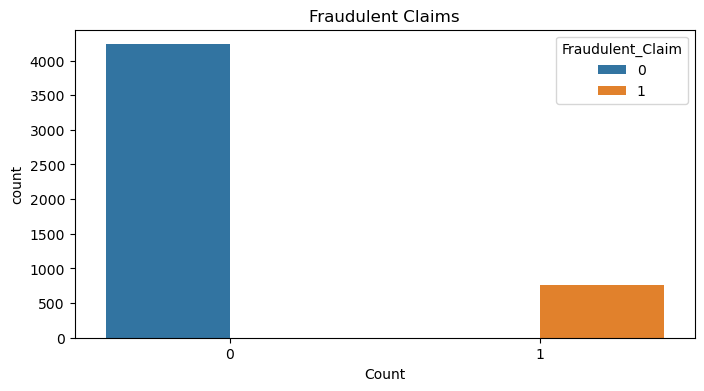

In [24]:
# Plot a bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='Fraudulent_Claim', data=df_claim, hue = "Fraudulent_Claim", alpha =1)
plt.title('Fraudulent Claims')
plt.xlabel('Count')
plt.show()

<div align='justify'>
There are significantly more legitimate claims compared to fraudulent ones in the dataset, indicating a class imbalance. This imbalance can lead to biased models that favor the majority class, reducing the model's ability to detect fraud accurately. To address this, we may need to apply techniques such as oversampling (e.g., SMOTE), undersampling, or using class weights during model training to ensure balanced learning.
</div>

2. <b> Fraud Rate by Claim Type </b>

- <b>Why</b>: See which Claim_Type (e.g., Home, Auto, Life) is more associated with fraud.

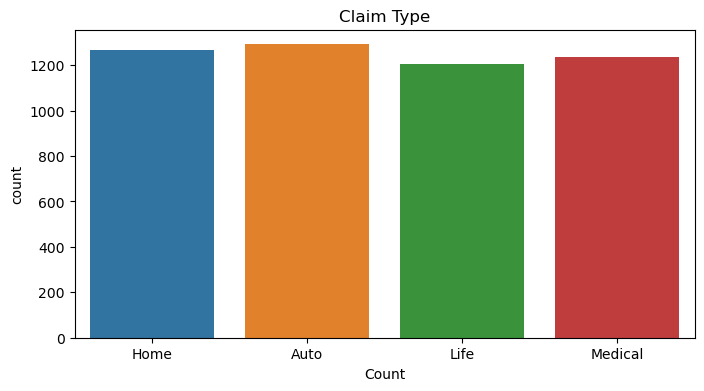

In [27]:
# Plot a bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='Claim_Type', data=df_claim, alpha =1)
plt.title('Claim Type')
plt.xlabel('Count')
plt.show()

<div align='justify'>
The claim types in the dataset are approximately equal in proportion, indicating a balanced distribution across different insurance products. However, the number of <b>Auto</b> claims is slightly higher compared to <b>Home</b> and <b>Life</b> claims, making it the most frequent claim type in the dataset.
</div>

3. <b> Claim Amount Distribution </b>
- <b>Why</b>: Visualize distribution of Claim_Amount by fraud status.

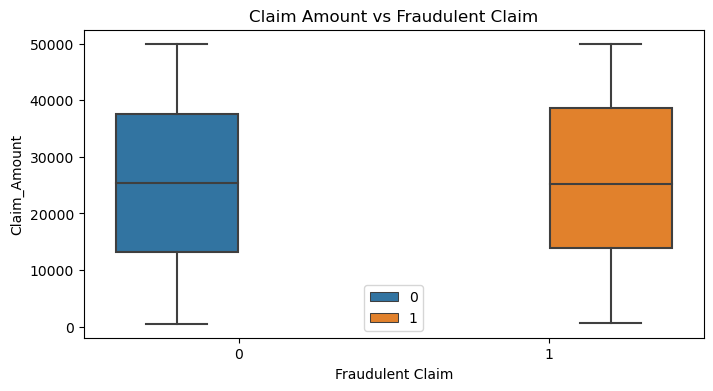

In [30]:
# Plot a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Fraudulent_Claim', y='Claim_Amount', data=df_claim, hue='Fraudulent_Claim')
plt.title('Claim Amount vs Fraudulent Claim')
plt.xlabel('Fraudulent Claim')
plt.legend(loc='best')
plt.show()

<div align='justify'>
The boxplot compares claim amounts between legitimate and fraudulent cases. While the overall distribution of claim amounts appears fairly similar in both categories, fraudulent claims tend to have slightly higher median values and upper whiskers. This suggests that some fraudulent cases may involve relatively larger claim amounts. However, due to the overlap in distributions, claim amount alone may not be a strong discriminator for fraud, but could still be a useful feature when combined with others in a machine learning model.
</div>

4.  <b> Delay vs. Fraud </b>
- <b>Why</b>: Check if fraudsters tend to delay or rush their claims.

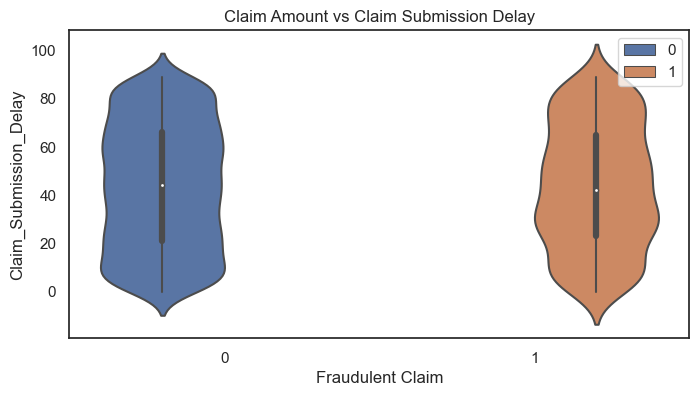

In [521]:
sns.set(style="white")
# Plot a violin plot
plt.figure(figsize=(8,4))
sns.violinplot(x='Fraudulent_Claim', y='Claim_Submission_Delay', hue='Fraudulent_Claim', data=df_claim)
plt.title('Claim Amount vs Claim Submission Delay')
plt.xlabel('Fraudulent Claim')
plt.legend(loc='upper right')
plt.show()

- Fraudulent claims seem slightly more concentrated around the mid-range (30–60 days).

5. <b> . Age vs. Claim Amount (Colored by Fraud)</b>
- <b>Why</b>: Spot trends in high claim amounts by customer age and fraud label.

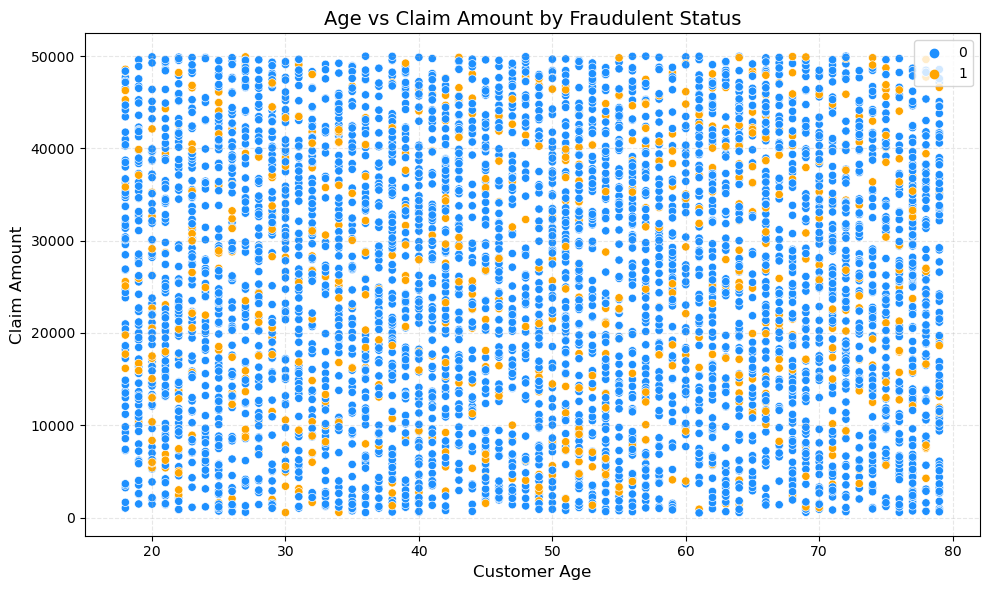

In [36]:
# # Plot a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Customer_Age', y='Claim_Amount',
                hue='Fraudulent_Claim',palette={0: 'dodgerblue', 1: 'orange'},
                data=df_claim)
plt.title('Age vs Claim Amount by Fraudulent Status', fontsize=14)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

- Fraudulent claims (orange) are scattered throughout with no strong concentration in any specific age bracket.
- Similarly, claim amounts are widely distributed for both classes.
- There’s no obvious visual correlation between age and the likelihood of fraud, meaning age alone isn’t a strong fraud indicator.

5. <b> Location and Fraud</b>
- <b>Why</b>: Identify if certain Location types (Urban/Suburban) are linked to fraud

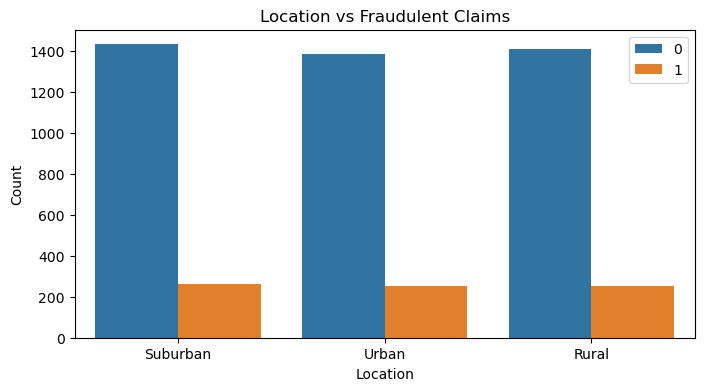

In [39]:
# Plot a bar chart
plt.figure(figsize=(8,4))
sns.countplot(x='Location', hue='Fraudulent_Claim', data=df_claim)
plt.title('Location vs Fraudulent Claims')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

- Fraudulent and legitimate insurance claims are evenly spread across all three location types: Rural, Urban, and Sub-Urban, with no significant bias or concentration of fraud in any particular location.

7. <b>Income vs. Fraud</b>
- <b>Why</b>: See if income level influences fraud tendencies.

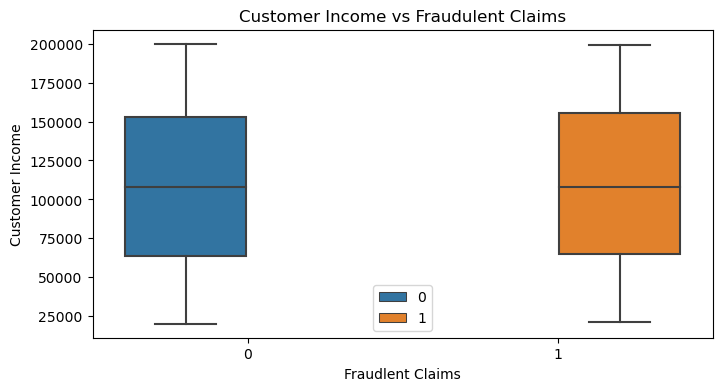

In [42]:
# Plot a boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='Fraudulent_Claim', y='Customer_Income', hue = 'Fraudulent_Claim', data=df_claim)
plt.title('Customer Income vs Fraudulent Claims')
plt.xlabel('Fraudlent Claims')
plt.ylabel('Customer Income')
plt.legend(loc='best')
plt.show()

- The median income appears almost the same for both groups.
- The spread (IQR) and range of incomes are also very similar.
- There’s no strong visual evidence that customer income differs between fraudulent and legitimate claimants.

### Visualize correlation of numerical variables through a heatmap

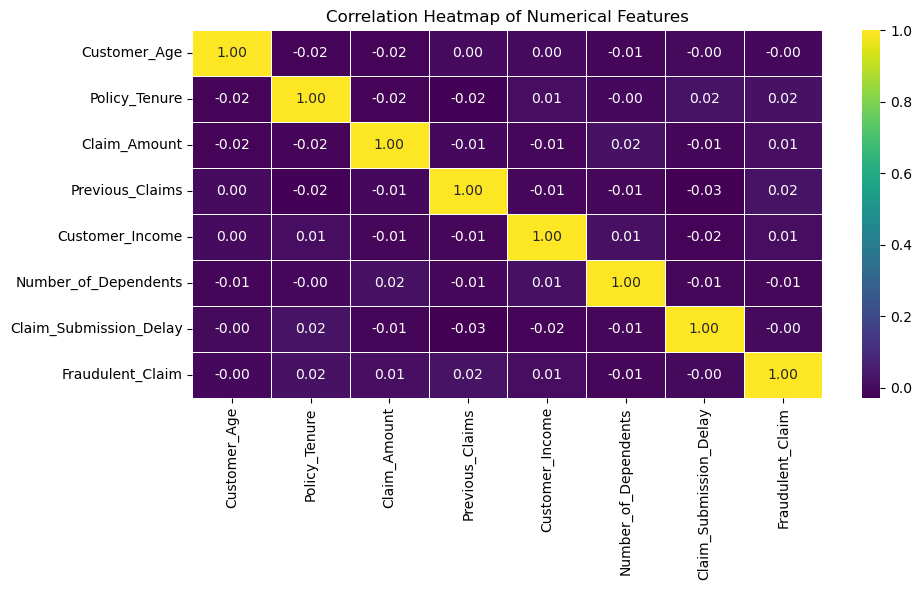

In [45]:
# Let us select only numerical columns
numeric_df = df_claim.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

<div align='justify'>
The correlation heatmap reveals a <b>very weak to no correlation</b> among the numerical variables in the dataset. This suggests that the features are largely independent of each other, which may be beneficial in avoiding multicollinearity during model training. 
</div>

### Feature Engineering 

<div align='justify'>
- <b>Why</b>: Feature engineering is essential to create, transform, or extract meaningful variables from raw data. It helps highlight underlying patterns, reduces noise, and improves model accuracy by making the data more suitable for learning.
</div>


### Check for Data Skewness

- We will check for skewness to help us understand whether the numerical variables are symmetrically distributed or skewed, which can impact model performance.

In [51]:
# Calculate skewness
skewness = numeric_df.skew().sort_values(ascending=False)

# Display skewness
print("Skewness of numerical features:\n")
print(skewness)

Skewness of numerical features:

Fraudulent_Claim          1.924142
Claim_Submission_Delay    0.035123
Customer_Income           0.028799
Previous_Claims           0.014777
Number_of_Dependents     -0.013325
Customer_Age             -0.013819
Claim_Amount             -0.023724
Policy_Tenure            -0.032595
dtype: float64


<div align='justify'>
Skewness analysis shows that all numerical features, except for <b>Fraudulent_Claim</b>, are approximately symmetric, with skewness values close to zero. This indicates that the data does not exhibit significant skewness and likely does not require transformation. The <b>Fraudulent_Claim</b> variable is expectedly right-skewed, as it is a binary classification label with more legitimate cases than fraudulent ones.
</div>

### Transform/Create New Variables

- <div align='justify'>
Most machine learning algorithms cannot work directly with categorical (text-based) data, as they require numerical input to learn from patterns. Therefore, it is essential to convert such categorical variables into numerical representations through encoding. In this dataset, features such as <b>Claim Type</b>, <b>Marital Status</b>, and <b>Location</b> must be transformed appropriately using techniques like one-hot encoding or label encoding to ensure compatibility with the modeling process.
</div> 

In [55]:
# Check uniqueness for each categorical variable
print(df_claim['Claim_Type'].unique()) # Claim type

print(df_claim['Marital_Status'].unique())# Marital status

print(df_claim['Location'].unique()) #Location

['Home' 'Auto' 'Life' 'Medical']
['Married' 'Divorced' 'Single' 'Widowed']
['Suburban' 'Urban' 'Rural']


<div align='justify'>
We will perform <b>One-Hot Encoding</b> to transform the categorical variables into numerical format. This approach is suitable for nominal variables such as <b>Claim Type</b>, <b>Marital Status</b>, and <b>Location</b>, which do not have an inherent order. One-hot encoding will generate binary columns for each category, enabling the model to process the data effectively.
</div>

In [57]:
df_encoded = pd.get_dummies(df_claim, columns=['Claim_Type', 'Marital_Status', 'Location'], drop_first=True)
df_encoded.head(4)

,Customer_Age,Policy_Tenure,Claim_Amount,Previous_Claims,Customer_Income,Number_of_Dependents,Claim_Submission_Delay,Fraudulent_Claim,Claim_Type_Home,Claim_Type_Life,Claim_Type_Medical,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Location_Suburban,Location_Urban
0,56,10,3466.30,0,58682,3,62,0,True,False,False,True,False,False,True,False
1,69,10,26121.17,4,140359,4,72,0,False,False,False,False,False,False,False,True
2,46,4,6659.49,1,175673,2,64,0,False,True,False,True,False,False,False,True
3,32,8,48128.70,2,52850,0,1,0,True,False,False,False,False,False,True,False


In [58]:
# Check the shape of our transformed data set
df_encoded.shape

(5000, 16)

In [59]:
# Move 'Fraudulent_Claim' to the end
target_col = 'Fraudulent_Claim'

df_encoded = df_encoded[[col for col in df_encoded.columns if col != target_col] + [target_col]]
df_encoded.head(4)

,Customer_Age,Policy_Tenure,Claim_Amount,Previous_Claims,Customer_Income,Number_of_Dependents,Claim_Submission_Delay,Claim_Type_Home,Claim_Type_Life,Claim_Type_Medical,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Location_Suburban,Location_Urban,Fraudulent_Claim
0,56,10,3466.30,0,58682,3,62,True,False,False,True,False,False,True,False,0
1,69,10,26121.17,4,140359,4,72,False,False,False,False,False,False,False,True,0
2,46,4,6659.49,1,175673,2,64,False,True,False,True,False,False,False,True,0
3,32,8,48128.70,2,52850,0,1,True,False,False,False,False,False,True,False,0


<div align='justify'>
We have successfully created new variables suitable to be used as predictors in our machine learning models. The categorical features have been transformed into a numerical format using one-hot encoding, making the dataset ready for the next phase: model development.
</div>

## Machine Learning Model Development  (Supervised Learning)

<div align='justify'>
Before proceeding to model development, it is essential to split the dataset into training and testing subsets. This ensures that we evaluate our model's performance on unseen data, thereby minimizing the risk of overfitting. To further enhance model reliability and generalizability, we will implement a <b>k-fold cross-validation</b> approach (10 folds) during training. This technique systematically partitions the training data into <i>10</i> subsets (folds), using each fold as a validation set while training on the remaining folds (9 folds). It allows us to assess model performance across multiple splits and helps in identifying the optimal hyperparameters for each algorithm.
</div>

<div align='justify'>
We will work based on the the <b>No Free Lunch (NFL) Theorem</b>. This theorem asserts that no single machine learning algorithm is universally superior across all problems. Each algorithm makes assumptions about the data, and these assumptions may or may not align with a given task. In the context of fraud detection, this means we must experiment with multiple models, such as KNN, Logistic Regression, SVM, Random Forest, and XGBoost, to determine which one best captures the underlying patterns in our specific dataset.
</div>

### Train-Test Split 

In [146]:
# Subset X and y variables
X = df_encoded.drop('Fraudulent_Claim', axis=1)
y = df_claim['Fraudulent_Claim']

# Perform train-test split. We are using 80% of our dat to train the model and 20% for model testing. Considering the class imbalance, we will use stratify to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,stratify=y)

# Print the shape
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (4000, 15)
X_test: (1000, 15)
y_train: (4000,)
y_test: (1000,)


<div align='justify'>
To train and evaluate our machine learning models, we split the dataset into training and testing sets. We allocate 80% of the data for training and 20% for testing. To preserve the class distribution of fraudulent and legitimate claims in both subsets, we use stratified sampling. This ensures that the model learns and is evaluated on a representative distribution of both classes.
</div>

### Feature Scaling

<div align='justify'>
Since our dataset includes features with varying ranges (e.g., income vs. age), we apply feature scaling to ensure that all variables contribute equally to distance-based models such as KNN and SVM. This standardization is essential for accurate and stable model performance in algorithms that rely on distance metrics or projections in feature space.
</div>

<div align='justify'>
While feature scaling is essential for distance-based models like KNN and SVM, it is not required, and can even be detrimental, for tree-based models such as Random Forest and XGBoost. In this study, we preprocess the data differently depending on the model, applying scaling only where it meaningfully contributes to performance.
</div>

In [148]:
# Note. We have to scale before SMOTE
scaler = StandardScaler()

# For KNN, SVM, Logistic
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Synthetic Minority Oversampling Technique (SMOTE)

<div align='justify'>
Due to the imbalanced nature of our dataset and the inclusion of <b>K-Nearest Neighbors (KNN)</b> in our model development process, which does not support class weighting, we will apply <b>SMOTE (Synthetic Minority Oversampling Technique)</b> to balance the training data. While class weighting is a viable strategy for many algorithms such as Logistic Regression, SVM, Random Forest, and XGBoost, it is model-specific and not universally applicable. SMOTE offers a model-agnostic solution by generating synthetic samples of the minority class, making it suitable for ensuring balanced learning across all the models in our pipeline.
</div>

In [150]:
# It should be noted that SMOTE is only applied to the training data!! It should never be used on the test set

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data (for KNN, Logistic and SVM)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


# For Random Forest, XGBoost — use raw values
X_train_smote_raw, y_train_smote_raw = smote.fit_resample(X_train, y_train)

# Print shapes to confirm resampling
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)
print("y_train_smote shape:", X_train_smote_raw.shape)
print("y_train_smote shape:", y_train_smote_raw.shape)

X_train_smote shape: (6772, 15)
y_train_smote shape: (6772,)
y_train_smote shape: (6772, 15)
y_train_smote shape: (6772,)


### Train Models

### Model 1. K-Nearest Neighbours (kNN)

<div align='justify'>
K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm that classifies data points based on the majority class of their nearest neighbors. It is non-parametric and makes no assumptions about the underlying data distribution. However, KNN is sensitive to feature scaling and class imbalance, which is why we apply SMOTE to ensure balanced training data. Additionally, selecting an optimal value for <b>k</b> is crucial, as too small a value may lead to overfitting, while too large a value may underfit the data.
</div>

In [152]:
# Generate a list of  odd k numbers 
k_values = list(range(3,31,2)) # we will not use even numbers to avoid ties

# Initialize KNN Classifier
knn = KNeighborsClassifier()
                
# Define parameter grid
param_grid = {'n_neighbors': k_values}
                
# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='f1', n_jobs=-1)

# Fit the Model                
grid_search_knn.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='f1')

In [154]:
# Get the best parameters
best_k = grid_search_knn.best_params_['n_neighbors']
best_score = grid_search_knn.best_score_

print(f"Best k: {best_k}")
print(f'Best Score for KNN Model on cross-validation: {best_score:.3f}')

Best k: 3
Best Score for KNN Model on cross-validation: 0.849


<div align='justify'>
Although SMOTE was used to balance the training data, we use <b>F1 score</b> as the evaluation metric during hyperparameter tuning. F1 score is more informative than accuracy in fraud detection tasks, as it balances both <i>precision</i> and <i>recall</i>, helping to ensure the model effectively detects fraudulent claims while minimizing false alarms.
</div>

The optimal number of neighbors was found to be **k = 3**, achieving a cross-validated F1 Score of **84.9%**. This value of k balances model complexity and generalization performance effectively.

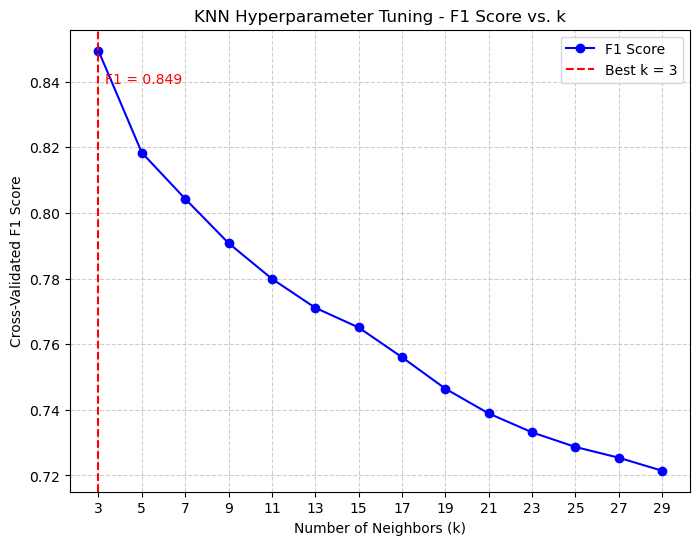

In [156]:
# Extract results from GridSearchCV
mean_f1 = grid_search_knn.cv_results_['mean_test_score']

# Plot F1 Score vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_f1, marker='o', linestyle='-', color='b', label="F1 Score")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated F1 Score")
plt.title("KNN Hyperparameter Tuning - F1 Score vs. k")
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Best k = {best_k}")
plt.text(best_k + 0.3, best_score - 0.01, f"F1 = {best_score:.3f}", color='red')
plt.xticks(k_values)  
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [116]:
# Save the KNN model
best_knn = grid_search_knn.best_estimator_ # Best model

joblib.dump(best_knn,'best_knn_classification_model.pkl') # Save the best model

['best_knn_classification_model.pkl']

### Test the Performance of the kNN Model on the Test Set

In [158]:
# Evaluate performance of the KNN model on the test set
y_pred = best_knn.predict(X_test_scaled)

# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.581

Confusion Matrix:
[[532 315]
 [104  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       847
           1       0.13      0.32      0.19       153

    accuracy                           0.58      1000
   macro avg       0.49      0.47      0.45      1000
weighted avg       0.73      0.58      0.64      1000



### Confusion Matrx for KNN Model Test Results

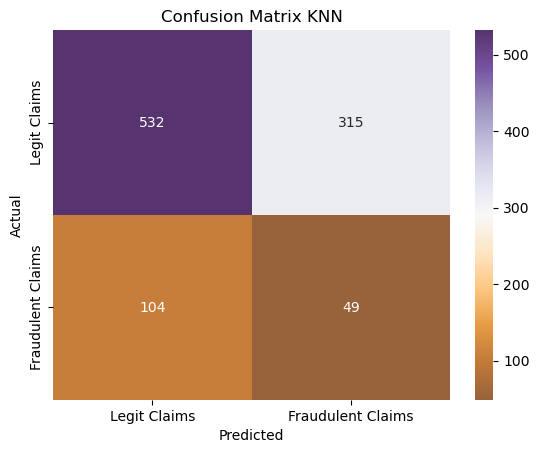

In [160]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'PuOr',fmt='d',alpha=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

- <div align='justify'>
The classification report indicates that the model performs reasonably well in identifying legitimate claims but struggles significantly with detecting fraudulent cases. While precision and recall for class 0 are relatively high, those for class 1 (fraud) remain low despite SMOTE being applied. This suggests that the model is still biased toward the majority class, resulting in a high number of false negatives and false positives for fraud detection. Further optimization, such as fine-tuning hyperparameters, testing other algorithms, or using ensemble methods, may be necessary to improve performance on the minority class.
</div>

### ROC Curve and AUC

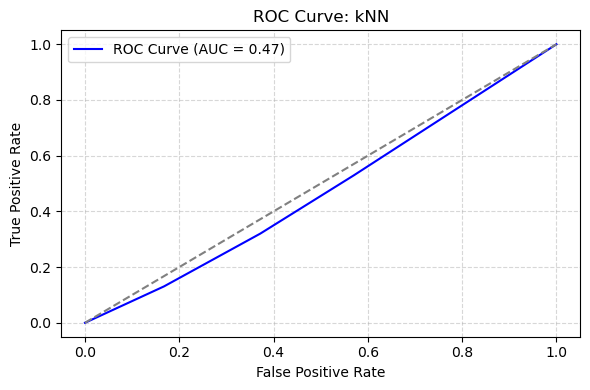

In [162]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = grid_search_knn.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: kNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- The AUC of 0.47 means the kNN model is unable to separate fraudulent from legitimate claims.

### Precison Recall for KNN Model

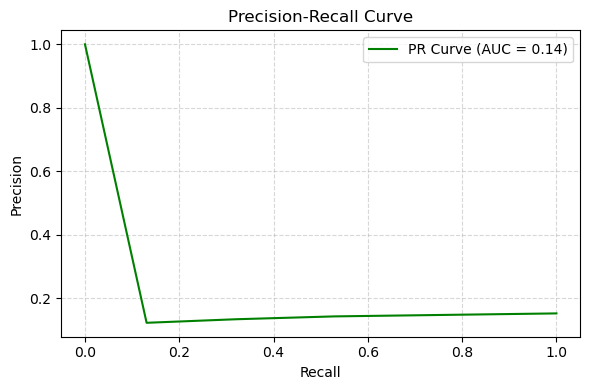

In [164]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align='justify'>
The Precision-Recall AUC of 0.14 indicates that the model struggles to reliably identify fraudulent claims, with a high rate of false positives. Despite applying SMOTE to balance the data, the current model (KNN) appears to lack the discriminative power necessary for effective fraud detection. This suggests the need to explore alternative models to improve performance.
</div>

## Model 2. Logistic Regression

<div align='justify'>
<b>Logistic Regression</b> is a simple yet effective baseline classification algorithm that models the probability of a binary outcome, such as fraud vs. legitimate claims. It is particularly useful in imbalanced datasets when combined with techniques such as <code>class_weight='balanced'</code>, as it helps account for the underrepresentation of fraudulent cases. Logistic Regression also offers interpretability, allowing us to understand the influence of each feature on the likelihood of fraud, making it a strong starting point before testing more complex models.
</div>

In [166]:
# Instantiate the logistic regression model
logr = LogisticRegression(solver='liblinear', random_state=42)

# Measure training time
start_time = time.time()

# Perform 10-fold cross-validation
cv_results = cross_val_score(logr, X_train_smote, y_train_smote, cv=10, scoring='f1')

end_time = time.time()
training_time = (end_time - start_time) / 60  # Convert to minutes

print(f'Training time: {training_time:.2f} minutes')

Training time: 0.00 minutes


In [168]:
# Refit the final model on the entire training set
logr.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42, solver='liblinear')

### Test the Logistic Regresion 

In [176]:
# Evaluate performance of the logistic regession model on the test set
y_pred = logr.predict(X_test_scaled)

# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.476

ROC AUC Score: 0.4952

Confusion Matrix:
[[396 451]
 [ 73  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.47      0.60       847
           1       0.15      0.52      0.23       153

    accuracy                           0.48      1000
   macro avg       0.50      0.50      0.42      1000
weighted avg       0.74      0.48      0.55      1000



### Confusion Matrix for Logistic Regression

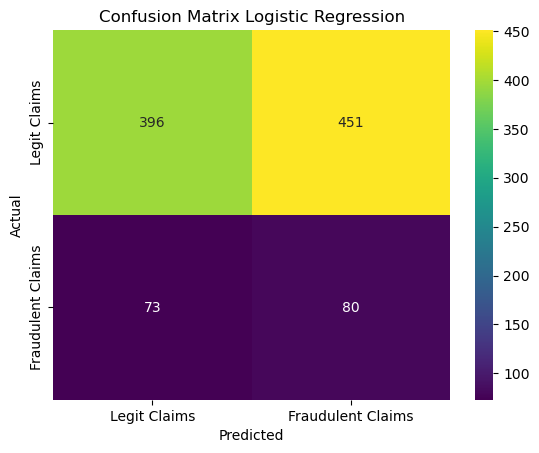

In [178]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

- <div align='justify'>
The logistic regression model demonstrates good performance in identifying legitimate claims but struggles significantly with fraudulent ones. While class 0 shows high precision and recall, class 1 (fraud) suffers from low precision (15%) and recall (23%), leading to a poor F1-score. Despite using SMOTE, the model continues to misclassify a large portion of fraud cases. This highlights the challenge of detecting rare events and suggests the need to explore more powerful or ensemble-based classifiers to improve fraud detection rates.
</div>

### ROC and AUC-Logistic Regression

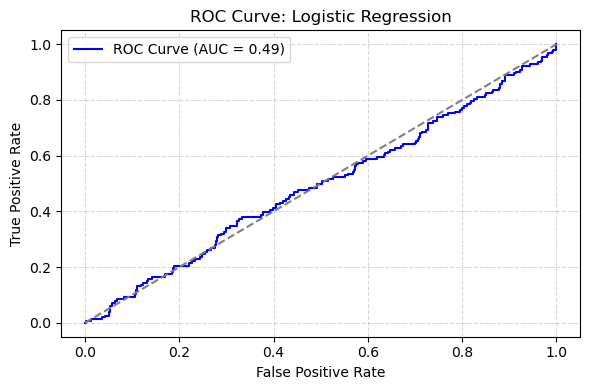

In [181]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = logr.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Precison Recall: Logistic Regression

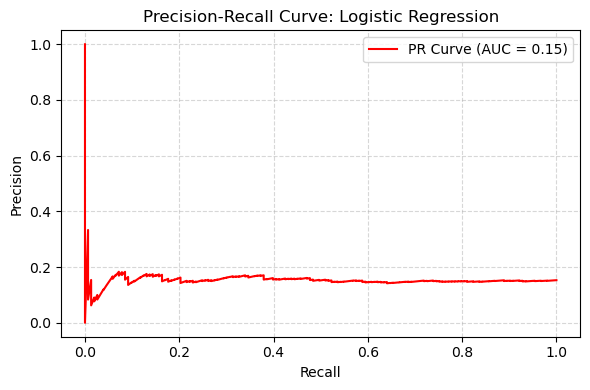

In [183]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='red', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Logistic Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- <div align='justify'>
Despite using SMOTE and logistic regression with appropriate evaluation metrics, the model achieves an <b>ROC AUC of 0.49</b> and a <b>Precision-Recall AUC of 0.15</b>. This is comparable to KNN and indicates a limited ability to detect fraudulent claims. These results suggest that logistic regression, a linear model, may not be capturing the complexity of the fraud patterns in the dataset. More sophisticated models such as Random Forest, XGBoost, or ensemble approaches may be necessary to improve detection performance.
</div>

### Model 3: Support Vector Machine

<div align='justify'>
<b>Support Vector Machine (SVM)</b> is a robust classification algorithm that works by finding the optimal boundary (hyperplane) that separates classes in the feature space. In this case study, SVM is applied to a SMOTE-balanced training set, eliminating the need for class weighting. This allows the model to focus purely on maximizing separation between fraudulent and legitimate claims without bias from class imbalance. SVM is particularly effective in high-dimensional settings and can capture complex boundaries through the use of kernel functions.
</div>

<div align='justify'>
To optimize the performance of the SVM model, we will perform hyperparameter tuning during cross-validation. This process involves testing different combinations of key parameters such as <b>Cost (C)</b>, which controls the trade-off between margin width and classification error; <b>kernel</b>, which determines the transformation of input data (e.g., linear, RBF); and <b>gamma</b>, which defines the influence of individual data points in non-linear kernels. Tuning these parameters allows us to identify the best model configuration for separating fraudulent and legitimate claims effectively.
</div>

In [186]:
# Define SVM
svm_model = SVC(random_state=42,probability=True)

# Define Hyperparameter Grid 
param_grid = {
    'C': [0.1, 0.5, 1, 5],  
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto'], 
} 

# Perform Grid Search

grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid,scoring='f1',cv=10, n_jobs=-1,verbose=2)

# Start time 
start_time = time.time()

# Fit the model
grid_search_svm.fit(X_train_smote,y_train_smote)

end_time = time.time()

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [190]:
# Compute the time to train the SVM Model
training_time = (end_time - start_time) / 60  # Convert to minutes

print(f'Training time: {training_time:.2f} minutes')

Training time: 42.58 minutes


In [192]:
# Print the best parameters
best_svm = grid_search_svm.best_estimator_
best_params = grid_search_svm.best_params_

print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


In [194]:
# Save the model
joblib.dump(grid_search_svm.best_estimator_, 'Best_SVM_Classification_model.pkl')

['Best_SVM_Classification_model.pkl']

### Test SVM Model on External Test Set

In [196]:
# Test the SVM Model
y_pred = best_svm.predict(X_test_scaled)
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.693

Confusion Matrix:
[[655 192]
 [115  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       847
           1       0.17      0.25      0.20       153

    accuracy                           0.69      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.75      0.69      0.72      1000



### Plot the Confusion Matrix: SVM

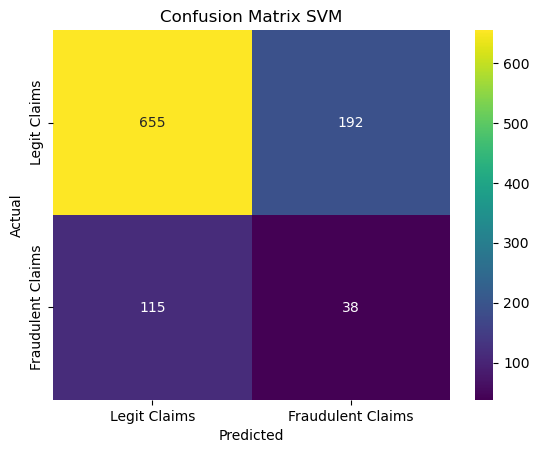

In [198]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

### ROC-AUC: SVM

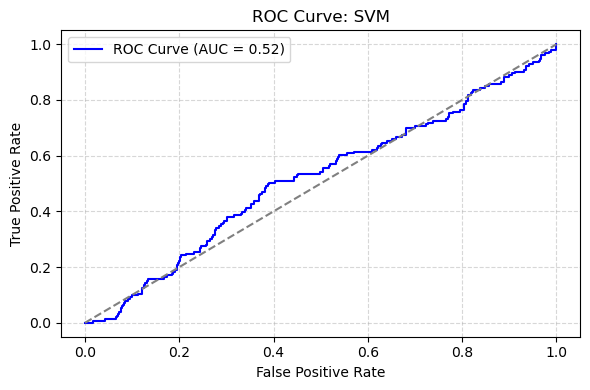

In [211]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = best_svm.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Precison-Recall: SVM Model

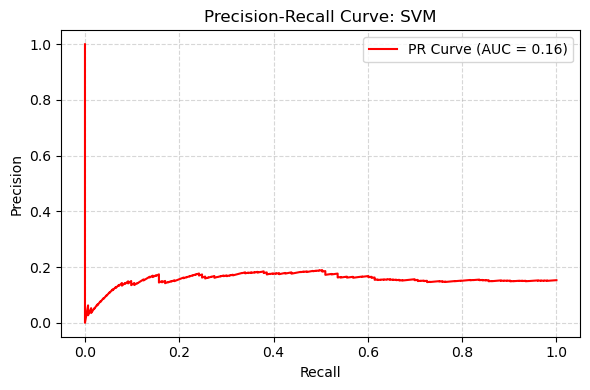

In [207]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='red', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: SVM')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align="justify">
A Support Vector Machine (SVM) model with a non-linear RBF kernel was tuned using GridSearchCV to optimize key hyperparameters (<code>C</code> and <code>gamma</code>). The model was trained on a SMOTE-balanced dataset and evaluated on a scaled test set. While the tuned SVM achieved good performance for the majority class (legitimate claims), with a precision of 0.85 and recall of 0.77, it struggled to accurately detect fraudulent claims. The fraud class had a precision of 0.17, recall of 0.25, and an F1-score of 0.20.

This outcome suggests that even with a non-linear kernel and optimized settings, the SVM model was not able to capture the complex patterns associated with fraud. This may be due to overlapping class distributions or insufficient signal in the features. Ensemble methods such as Random Forest, XGBoost and Stacked Ensembles may be better suited for this task due to their ability to capture non-linear interactions and model complexity more effectively.
</div>

### Ensemble Methods

<div align='justify'>
<b>Ensemble methods</b> combine the predictions of multiple base learners to produce a more robust and accurate model. They are particularly effective in complex classification problems such as fraud detection, where no single model performs best under all circumstances.

- <b>Random Forest (RF)</b> is an ensemble of decision trees trained on different subsets of the data with random feature selection. It improves accuracy and reduces overfitting compared to individual decision trees.

- <b>XGBoost (Extreme Gradient Boosting)</b> is a powerful boosting algorithm that builds trees sequentially, with each new tree correcting the errors of the previous ones. It includes regularization and parallel processing, making it both fast and effective on imbalanced datasets.

- <b>Stacked Ensembles</b> combine multiple diverse models (e.g., logistic regression, SVM, KNN, etc.) and use a meta-model to learn from their combined predictions. This allows the ensemble to capture a wider range of patterns and improves generalization, especially when base models have complementary strengths.

These ensemble techniques are particularly useful in fraud detection, as they help improve recall for the minority class while maintaining high overall predictive performance.
</div>

### Model 4. Random Forest 

In [215]:
# Define Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
    
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1) 

# Start time 
start_time = time.time()
# Train the Random Forest Model
grid_search_rf.fit(X_train_smote_raw, y_train_smote)

# end time
end_time = time.time()

In [217]:
# Compute the time to train the RF Model
training_time = (end_time - start_time) / 60  # Convert to minutes

print(f'Training time: {training_time:.2f} minutes')

Training time: 4.63 minutes


In [220]:
# Get the best parameters for the Random Forest Model
best_params = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

print(f'Best Parameters:\n {best_params}')
print(f'Best estimator:\n {best_rf}')

Best Parameters:
 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator:
 RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)


In [223]:
# Save the model
joblib.dump(grid_search_rf.best_estimator_, 'Best_Random_Forest_Classification_model.pkl')

['Best_Random_Forest_Classification_model.pkl']

### Evaluate important features (Feature Importance)

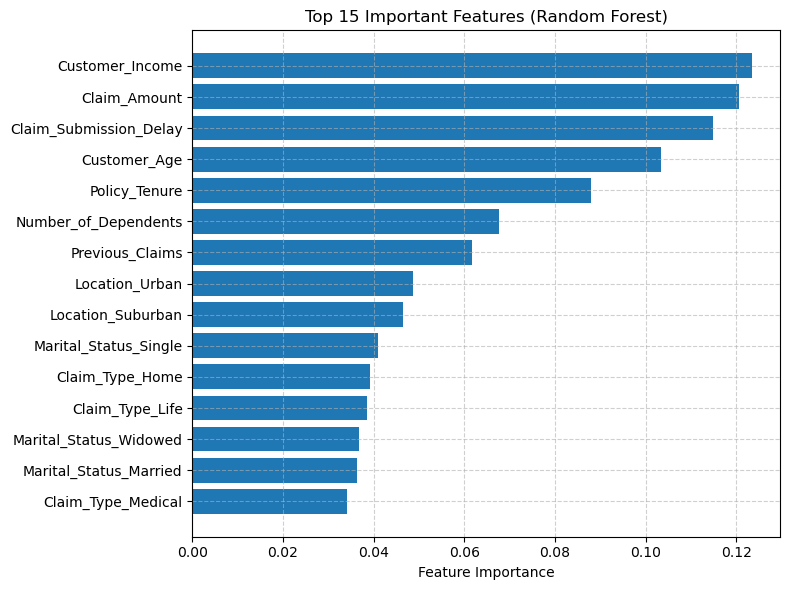

In [244]:
# Get feature importances
importances = best_rf.feature_importances_
features = X_train_smote_raw.columns  

# Create a DataFrame and sort
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'][:15][::-1], feat_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (Random Forest)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div align='justify'>
The Random Forest model identified <b>Customer_Income</b>, <b>Claim_Amount</b>, and <b>Claim_Submission_Delay</b> as the most influential features in predicting whether a claim is fraudulent. Other top contributors include <b>Customer_Age</b>, <b>Policy_Tenure</b>, and <b>Number_of_Dependents</b>, suggesting that demographic and behavioral patterns play a significant role in the model's decisions.

Interestingly, some categorical features such as <b>Location_Urban</b> and <b>Claim_Type_Home</b> also appear among the top predictors. This highlights that not just financial factors, but also context-related variables (e.g., claim type and customer location) contribute to fraud detection.

Although these results help us understand what the model is focusing on, they do not indicate the direction of influence (i.e., whether a higher income increases or decreases fraud probability). For deeper interpretability, SHAP values are more informative.
</div>

### Test RF Model

In [227]:
# Test the RF Model
y_pred = best_rf.predict(X_test)
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.796

Confusion Matrix:
[[783  64]
 [140  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       847
           1       0.17      0.08      0.11       153

    accuracy                           0.80      1000
   macro avg       0.51      0.50      0.50      1000
weighted avg       0.74      0.80      0.77      1000



### RF Confusion Matrix

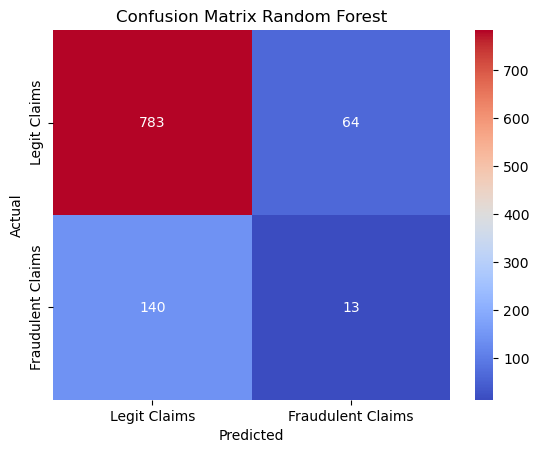

In [229]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'coolwarm',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

### ROC-AUC Random Forest

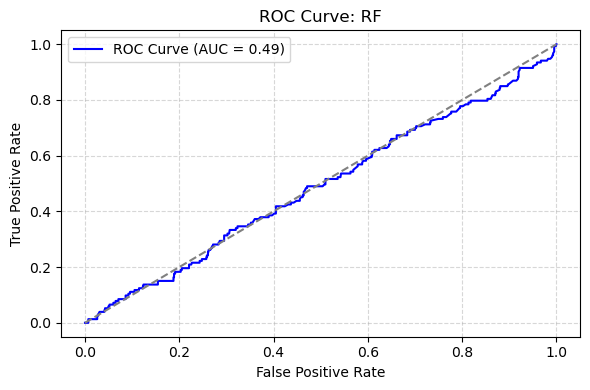

In [235]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: RF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Precision-Recall: Random Forest

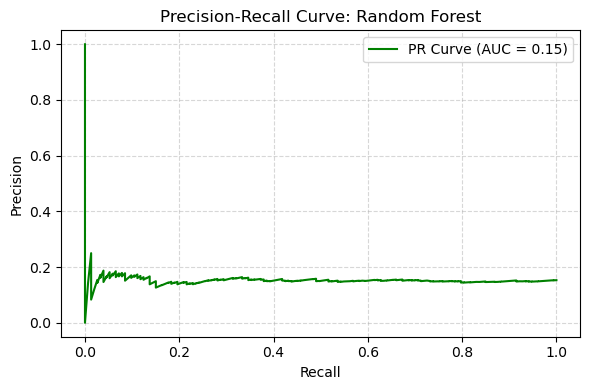

In [238]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Random Forest')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align='justify'>
The Random Forest model achieved high overall accuracy (79.6%) and strong performance on legitimate claims, with a precision of 0.85 and recall of 0.92. However, its performance on detecting fraudulent claims was significantly lower, with a recall of just 8% and an F1-score of 0.11. Despite its robustness and ability to model complex patterns, Random Forest struggled with the minority class, even after applying SMOTE.

This imbalance led to a high number of false negatives, where fraud cases were misclassified as legitimate. From a business perspective, this could result in substantial undetected losses. These results reinforce the importance of using fraud-specific strategies, such as cost-sensitive learning, boosting methods like XGBoost, or stacked ensembles to better capture rare events like insurance fraud.
</div>

### Model 5. XGB Classification

<div align='justify'>
<b>XGBoost (Extreme Gradient Boosting)</b> is a powerful, scalable machine learning algorithm based on gradient boosting decision trees. It builds models in a sequential manner, where each new tree corrects the errors made by the previous ones. XGBoost includes advanced features such as regularization, missing value handling, parallelization, and early stopping, making it faster and more robust than traditional boosting methods.

In the context of fraud detection, XGBoost is particularly effective because it can handle class imbalance, capture complex feature interactions, and deliver high predictive performance even with noisy or non-linear data. Its flexibility and superior accuracy often make it a top choice in machine learning competitions and real-world applications.
</div>

In [282]:
# Define the model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,400,500],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7,9,11,13],  # Maximum depth of tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 0.9]  # Fraction of features used per tree
}

start_time = time.time()

# GridSearchCV with 10-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='accuracy',cv=10,verbose=1,n_jobs=-1)

# Fit the model
grid_search_xgb.fit(X_train_smote_raw, y_train_smote_raw)

end_time = time.time()
time_taken = (end_time - start_time) / 60

Fitting 10 folds for each of 2430 candidates, totalling 24300 fits


In [283]:
# Compute the time to train the MLP Model
training_time = time_taken

print(f'Training time: {training_time:.2f} minutes')

Training time: 83.10 minutes


In [284]:
# Get best parameters and model
best_params = grid_search_xgb.best_params_
best_xgb = grid_search_xgb.best_estimator_

print(f'The best parameters for the model: {best_params}')

The best parameters for the model: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.9}


In [298]:
# Save the model
joblib.dump(best_xgb, 'Best_XGB_Classification_model.pkl')

['Best_XGB_Classification_model.pkl']

### Test XGB Model

In [286]:
# Test the XGB Model
y_pred = best_xgb.predict(X_test)
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.785

Confusion Matrix:
[[773  74]
 [141  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       847
           1       0.14      0.08      0.10       153

    accuracy                           0.79      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.74      0.79      0.76      1000



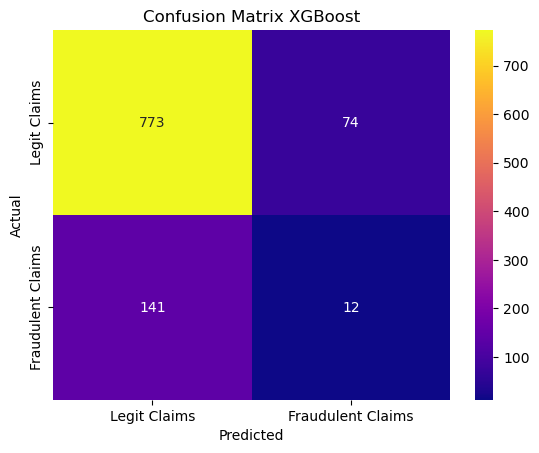

In [295]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'plasma',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

### ROC-AUC: XGBoost

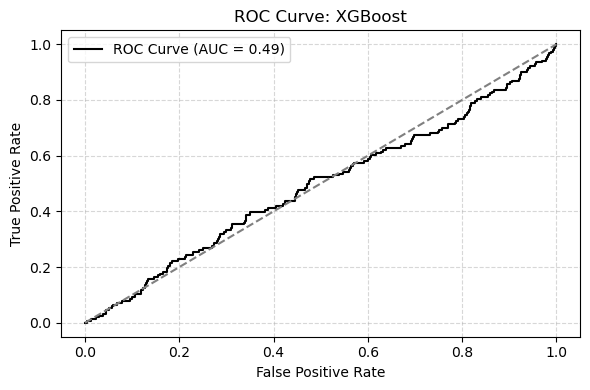

In [305]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='black', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Precision-Recall: XGBoost

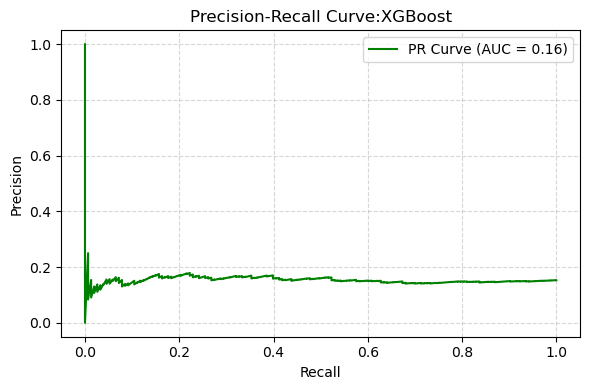

In [307]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:XGBoost')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align='justify'>
XGBoost achieved strong performance on the majority class, with a precision of 0.85 and recall of 0.91 for legitimate claims. However, its performance on fraudulent claims remained low, with a recall of just 8% and an F1-score of 0.10. Despite being a high-capacity model with advanced boosting capabilities, XGBoost struggled to capture the limited and possibly noisy signal present in the minority class. These results align with those of other models in the study and suggest that further improvements may rely more on feature engineering, threshold tuning, or alternative strategies such as cost-sensitive learning rather than model complexity alone.
</div>

### Model 6: Multilayer Perceptron (MLP)

<div align="justify">
A <b>Multilayer Perceptron (MLP)</b> is a type of feedforward artificial neural network composed of an input layer, one or more hidden layers, and an output layer. Each layer contains interconnected neurons that learn patterns in the data through a process called backpropagation. MLPs are capable of modeling complex, non-linear relationships between features, making them suitable for classification tasks such as fraud detection. When trained on properly preprocessed data, MLPs can uncover hidden structures that simpler models might miss.
</div>

In [323]:
# Define MLP model
mlp = MLPClassifier(max_iter=500, random_state=42)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],  # Varying number of layers/neurons
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']  # Learning rate strategy
}

# GridSearchCV with 5-fold cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)

start_time = time.time()

# Fit the MLP model
grid_search_mlp.fit(X_train_smote,y_train_smote)

end_time = time.time()

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [330]:
grid_search_mlp

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50),
                                                (100, 50, 25)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [327]:
# Compute the time to train the MLP Model

time_taken = (end_time - start_time) / 60
training_time = time_taken

print(f'Training time: {training_time:.2f} minutes')

Training time: 26.31 minutes


In [333]:
# print the best parameters and model
best_param = grid_search_mlp.best_params_
best_mlp = grid_search_mlp.best_estimator_

print(f'The best parameters for the model are: {best_param}')
print(f'The best score: {grid_search_mlp.best_score_:2f}')

The best parameters for the model are: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
The best score: 0.888810


In [336]:
# Save the model
joblib.dump(best_mlp,'best_mlp_model.pkl')

['best_mlp_model.pkl']

### Test MLP Model

In [340]:
# Test the XGB Model
y_pred = best_mlp.predict(X_test_scaled)
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.728

Confusion Matrix:
[[702 145]
 [127  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       847
           1       0.15      0.17      0.16       153

    accuracy                           0.73      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.74      0.73      0.73      1000



### Confusion Matrix MLP

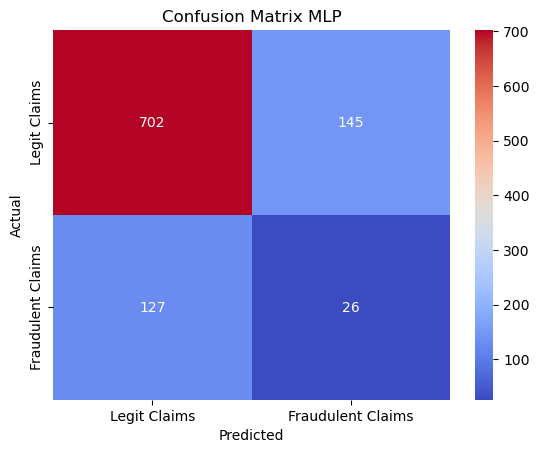

In [347]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'coolwarm',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MLP')
plt.show()

### ROC-AUC Curve MLP

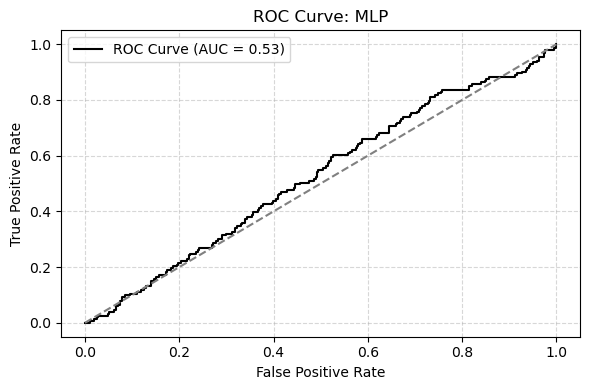

In [353]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = best_mlp.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='black', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MLP')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Precision Recall: MLP

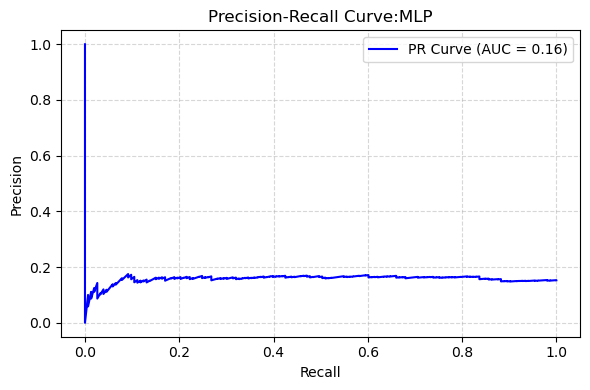

In [359]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:MLP')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align="justify">
The latest model achieved an overall accuracy of 73% and performed strongly on legitimate claims, with an F1-score of 0.84. While there was a slight improvement in identifying fraud cases (recall increased to 17%), precision for the fraud class remained low at 15%. This means the model can flag some frauds, but it also generates a significant number of false alarms.

From a business standpoint, this model can support fraud investigators by prioritizing suspicious claims, but it should not be used in isolation for final decisions. We will therefore try leveraging stacked ensembles to check whether it will improve model performance.
</div>

### Model 7: Stacked Ensembles

<div align="justify">
<b>Stacked Ensembles</b> are an advanced machine learning technique that combines multiple different models to create a more powerful and reliable predictor. Instead of relying on a single algorithm, stacking uses several base models (e.g., Random Forest, SVM, XGBoost) to generate predictions, which are then fed into a final model, known as the meta-learner, that learns how to best combine them. This layered approach helps capture a broader range of patterns and interactions in the data, often leading to better performance, especially in complex tasks like fraud detection.
</div>

In [373]:
# We will use the previously trained and optimized models as base learners

# 1. Define base learners
base_learners = [
    ('knn', best_knn),
    ('logistic', logr),
    ('svm', best_svm),
    ('RF',best_rf),
    ('XGBoost',best_xgb),
    ('MLP',best_mlp)
]

# 2. Define meta-learner
meta_model = LogisticRegression(max_iter=500, random_state=42)


# 3. Build the stacked model
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# 4. Train on SMOTE-balanced, scaled training data
start_time = time.time()

stacked_model.fit(X_train_smote, y_train_smote)

end_time = time.time()

In [375]:
# Compute the time to train the Stacked Ensemble Model

time_taken = (end_time - start_time) / 60
training_time = time_taken

print(f'Training time: {training_time:.2f} minutes')

Training time: 18.93 minutes


In [381]:
# Save the model
joblib.dump(stacked_model,'best_stacked_model.pkl')

['best_stacked_model.pkl']

In [383]:
# Test the Stacked Model
y_pred = stacked_model.predict(X_test_scaled)
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.790

Confusion Matrix:
[[783  64]
 [146   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       847
           1       0.10      0.05      0.06       153

    accuracy                           0.79      1000
   macro avg       0.47      0.49      0.47      1000
weighted avg       0.73      0.79      0.76      1000



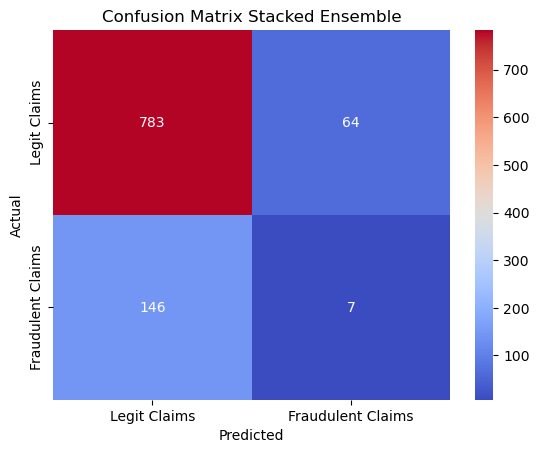

In [385]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'coolwarm',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Stacked Ensemble')
plt.show()

### ROC-AUC: Stacked Ensemble

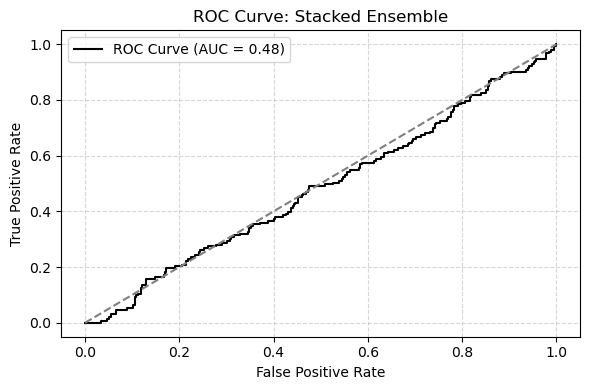

In [388]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = stacked_model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='black', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Stacked Ensemble')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Precision-Recall:Stacked Ensemble

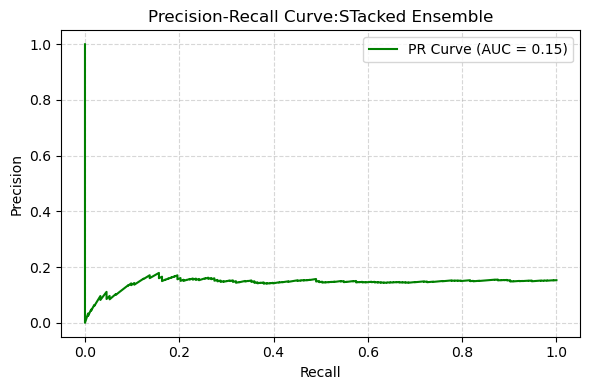

In [390]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:Stacked Ensemble')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align='justify'>
The stacked ensemble model was trained on a SMOTE-balanced dataset to address the class imbalance between legitimate and fraudulent claims. It achieved a strong overall accuracy of 79% and performed exceptionally well in identifying legitimate claims (F1-score: 0.88). However, its ability to detect fraudulent claims remained very limited, with a recall of just 5% and an F1-score of 0.06 for the fraud class.

Despite combining six diverse models (KNN, Logistic Regression, SVM, Random Forest, XGBoost, and MLP), the ensemble struggled to generalize fraud detection on the original, imbalanced test set. This highlights a critical limitation: while SMOTE can improve training balance, it does not necessarily translate to better fraud recall in real-world scenarios. For meaningful improvements, the focus should shift toward better feature engineering, threshold adjustment, and cost-sensitive learning approaches tailored to rare-event classification.
</div>

### Cost-Sensitive Learning 

<div align='justify'>
Despite applying SMOTE to balance the training data, most models still struggled to accurately detect fraudulent claims. This highlighted the limitations of synthetic oversampling, particularly when the original fraud signal is weak or inconsistent. To address this, we explore <b>cost-sensitive learning</b> on a few selected models (Logistic Regression, SVM, Random Forest, and XGBoost).

Cost-sensitive learning adjusts the model to place greater emphasis on correctly identifying the minority (fraud) class by penalizing misclassification errors more heavily. Unlike SMOTE, it avoids altering the original data and can lead to better generalization on real-world, imbalanced datasets. This approach aims to improve fraud recall without introducing synthetic bias.
</div>

### Cost-Sensitive Logistic Regression 

In [398]:
# Run logistic regression 
logreg_weighted = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
logreg_weighted.fit(X_train_scaled, y_train)

y_pred = logreg_weighted.predict(X_test_scaled)
y_prob = logreg_weighted.predict_proba(X_test_scaled)[:, 1]

In [400]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Confusion Matrix:
 [[395 452]
 [ 72  81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.47      0.60       847
           1       0.15      0.53      0.24       153

    accuracy                           0.48      1000
   macro avg       0.50      0.50      0.42      1000
weighted avg       0.74      0.48      0.55      1000

ROC AUC Score: 0.4912


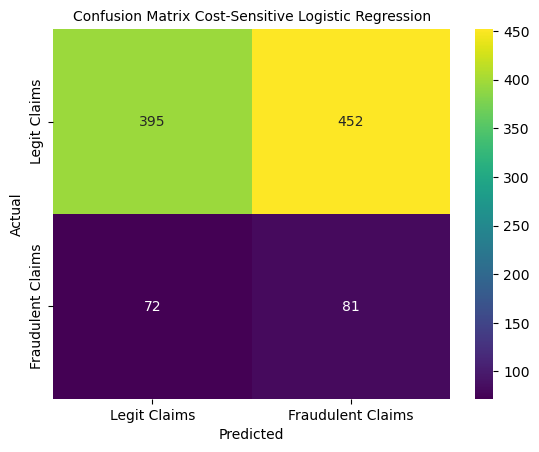

In [407]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Cost-Sensitive Logistic Regression', fontsize=10)
plt.show()

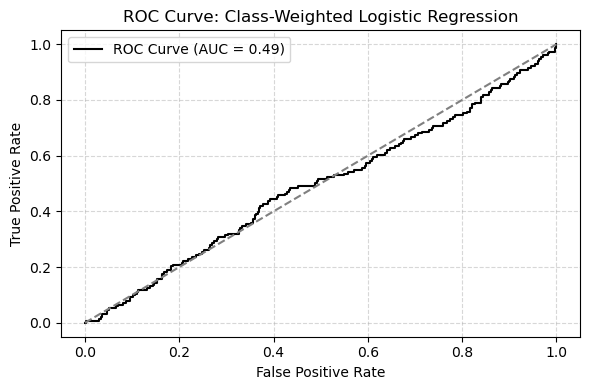

In [413]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = logreg_weighted.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='black', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Class-Weighted Logistic Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

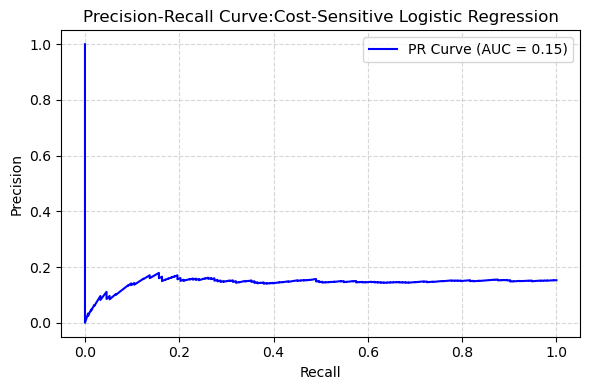

In [410]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:Cost-Sensitive Logistic Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align="justify">
In testing both SMOTE and cost-sensitive learning with Logistic Regression, we observed almost identical results. Both approaches achieved around 48% accuracy and were able to detect just over 50% of fraudulent claims. Precision for the fraud class remained low (15%), indicating a high number of false positives. This suggests that, for Logistic Regression, either method can be used interchangeably with similar impact. However, neither approach alone is sufficient to reliably separate fraudulent from legitimate claims, reinforcing the need for stronger features or more advanced modeling techniques.
</div>

### Cost-Sensitive Support Vector Machine

In [415]:
# Define SVM with cost-sensitive learning
svm_model_weighted = SVC(random_state=42, probability=True, class_weight='balanced')

# Define hyperparameter grid
param_grid = {
    'C': [0.5, 1, 5],  
    'kernel': ['rbf'], 
    'gamma': ['scale'], 
}

# Setup Grid Search with F1 as scoring metric
grid_search_svm_weighted = GridSearchCV(
    estimator=svm_model_weighted,
    param_grid=param_grid,
    scoring='f1',
    cv=10,
    n_jobs=-1,
    verbose=2
)

# Fit model to scaled data
start_time = time.time()
grid_search_svm_weighted.fit(X_train_scaled, y_train)  
end_time = time.time()

#  Output best model
print("Best Parameters:", grid_search_svm_weighted.best_params_)
print(f"Training Time: {(end_time - start_time) / 60:.2f} minutes")

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Parameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Training Time: 3.25 minutes


In [419]:
y_pred = grid_search_svm_weighted.predict(X_test_scaled)
y_prob = grid_search_svm_weighted.predict_proba(X_test_scaled)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Confusion Matrix:
 [[481 366]
 [ 81  72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.57      0.68       847
           1       0.16      0.47      0.24       153

    accuracy                           0.55      1000
   macro avg       0.51      0.52      0.46      1000
weighted avg       0.75      0.55      0.62      1000

ROC AUC Score: 0.4928


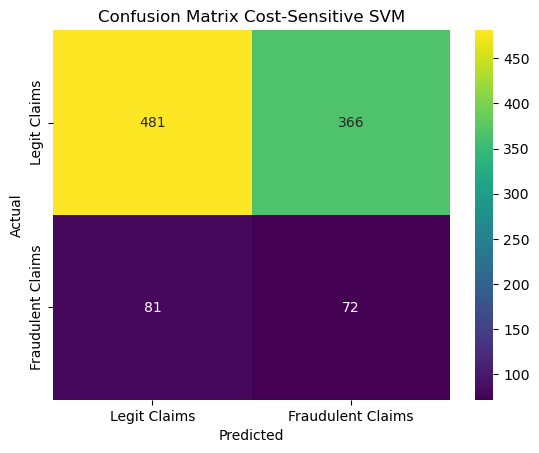

In [421]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Cost-Sensitive SVM')
plt.show()

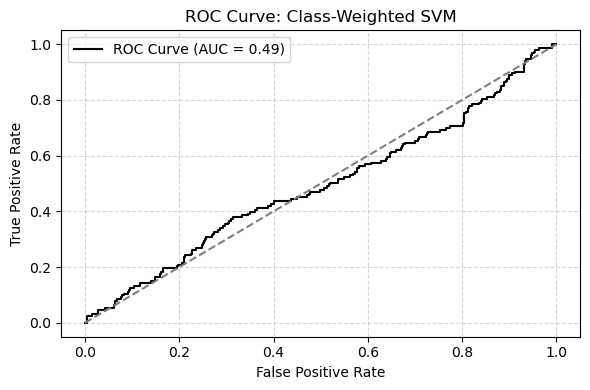

In [427]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = grid_search_svm_weighted.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='black', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Class-Weighted SVM')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

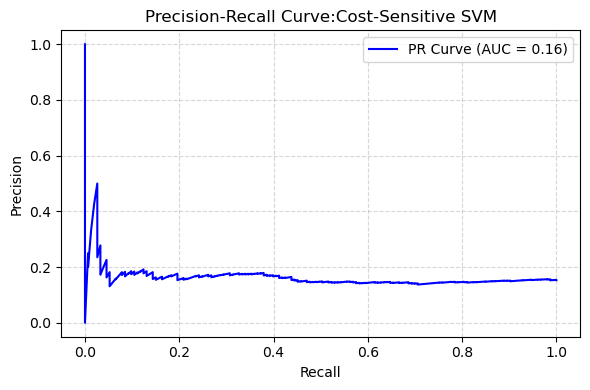

In [429]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:Cost-Sensitive SVM')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div align="justify">
We compared two approaches to improving fraud detection using SVM: SMOTE oversampling and cost-sensitive learning. The SMOTE-based model achieved better overall accuracy (69.3%) and higher recall for legitimate claims, but only detected 25% of fraud cases. In contrast, the cost-sensitive SVM significantly improved fraud recall to 47%, nearly doubling detection, though at the expense of lower accuracy and more false positives. This demonstrates a critical trade-off: while SMOTE preserves balance, cost-sensitive learning is more effective when the business priority is to catch as many fraud cases as possible.
</div>

### Cost-Sensitive Random Forest

<div align="justify">
Approach: Scaling is not required for Random Forest because it is a tree-based algorithm that splits data based on feature thresholds, not distance. As a result, it is inherently insensitive to the scale or distribution of the input features.
</div>

In [435]:
# Define Random Forest classifier
rf_classifier_weighted = RandomForestClassifier(class_weight='balanced',random_state=42)

# Set up parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
    
# Initialize GridSearchCV
grid_search_rf_weighted = GridSearchCV(estimator=rf_classifier_weighted, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1) 

# Start time 
start_time = time.time()

# Train the Random Forest Model
grid_search_rf_weighted.fit(X_train, y_train)

# end time
end_time = time.time()

#  Output best model
print("Best Parameters:", grid_search_rf_weighted.best_params_)
print(f"Training Time: {(end_time - start_time) / 60:.2f} minutes")

C:\Users\abc\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Training Time: 3.16 minutes


In [441]:
y_pred = grid_search_rf_weighted.predict(X_test)
y_prob = grid_search_rf_weighted.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Confusion Matrix:
 [[807  40]
 [146   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       847
           1       0.15      0.05      0.07       153

    accuracy                           0.81      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.74      0.81      0.77      1000

ROC AUC Score: 0.4894


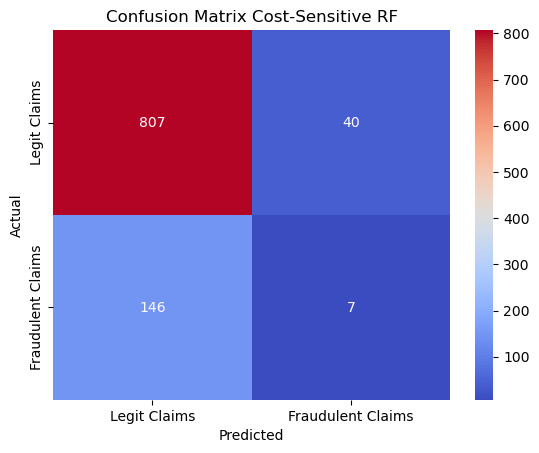

In [443]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'coolwarm',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Cost-Sensitive RF')
plt.show()

<div align="justify">
The Random Forest model trained with SMOTE achieved a fraud recall of 8%, slightly outperforming the cost-sensitive version, which only detected 5% of fraudulent cases. While the cost-sensitive model achieved slightly better overall accuracy (81% vs. 79.6%) and legitimate claim performance, both approaches struggled to generalize fraud patterns. This result highlights that simply rebalancing the training data or assigning class weights may not be enough to significantly improve fraud detection. 
</div>

## Check Important Features

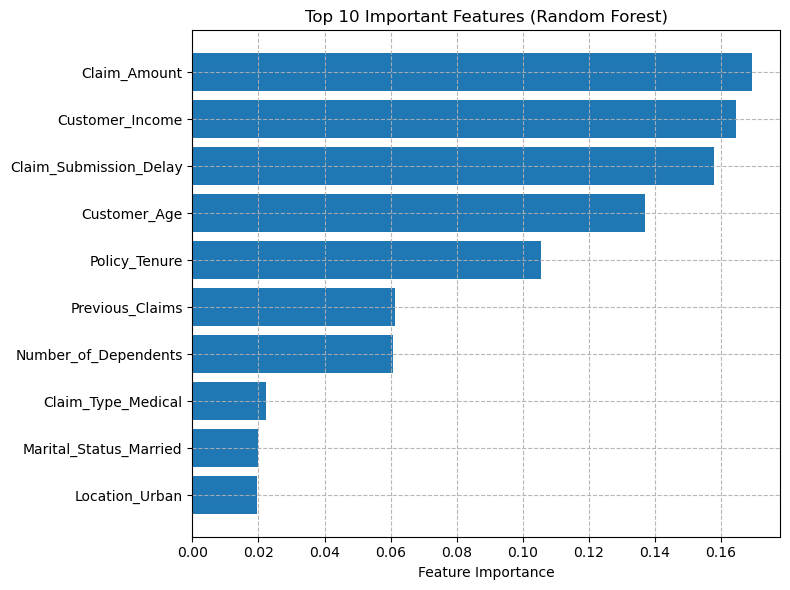

In [455]:
# Get feature importances
best_rf_wt = grid_search_rf_weighted.best_estimator_
importances = best_rf_wt.feature_importances_
features = X_train.columns  

# Create a DataFrame and sort
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'][:10][::-1], feat_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

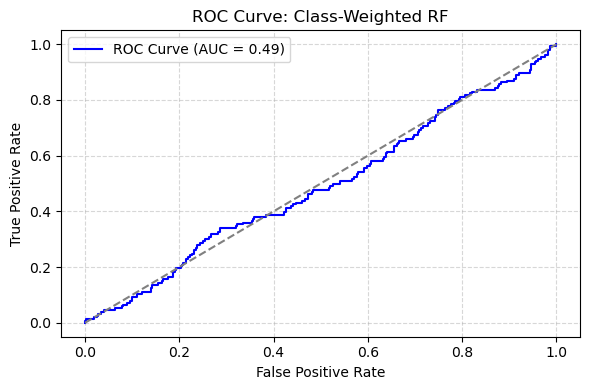

In [459]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = grid_search_rf_weighted.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Class-Weighted RF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

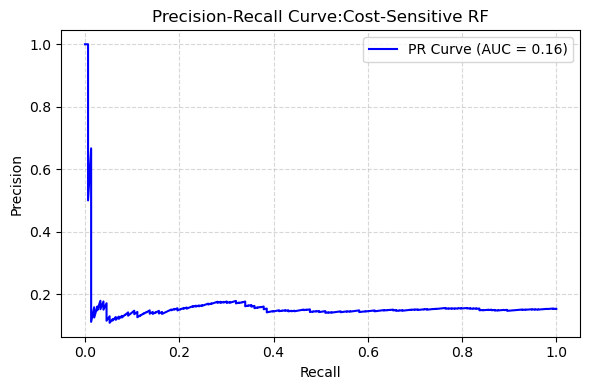

In [461]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:Cost-Sensitive RF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Cost-Sensitive XGBoost 

In [488]:
# Calculate scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

# Define cost-sensitive model
xgb_model_cw = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7,9,11],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Start timer
start_time = time.time()

# Grid search
grid_search_xgb_cw = GridSearchCV(
    estimator=xgb_model_cw,
    param_grid=param_grid,
    scoring='f1',
    cv=10,
    verbose=1,
    n_jobs=-1
)

# Fit model on originaltraining data
grid_search_xgb_cw.fit(X_train, y_train)

# End timer
end_time = time.time()
time_taken = (end_time - start_time) / 60

# Output results
print("Best Parameters:", grid_search_xgb_cw.best_params_)
print(f"Training Time: {time_taken:.2f} minutes")

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.8}
Training Time: 17.63 minutes


### SHAP Values

In [536]:
# Create SHAP explainer using TreeExplainer
explainer = shap.Explainer(best_xgb_cw)

# Compute SHAP values on a subset of the test data for interpretability
shap_values = explainer(X_test)

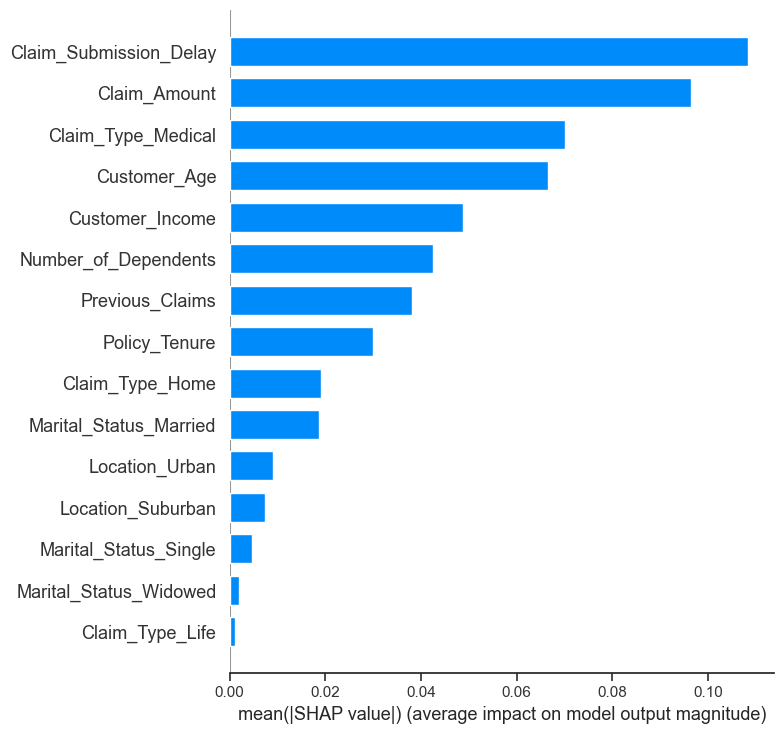

In [538]:
# Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


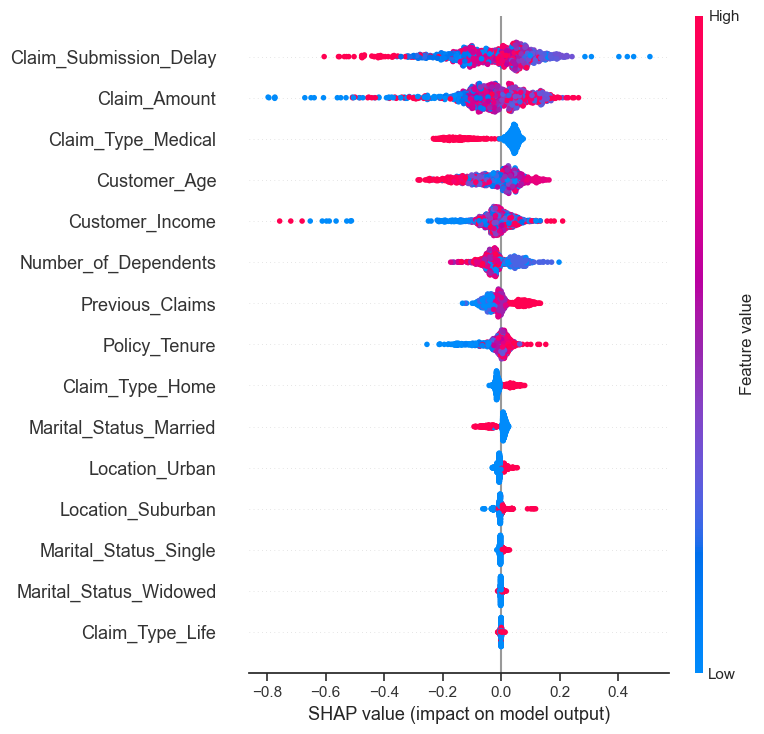

In [540]:
# Beeswarm plot
shap.summary_plot(shap_values, X_test)

In [528]:
best_xgb_cw = grid_search_xgb_cw.best_estimator_
y_pred = best_xgb_cw.predict(X_test)
y_prob = best_xgb_cw.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Confusion Matrix:
 [[547 300]
 [ 98  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.73       847
           1       0.15      0.36      0.22       153

    accuracy                           0.60      1000
   macro avg       0.50      0.50      0.47      1000
weighted avg       0.74      0.60      0.65      1000

ROC AUC Score: 0.5074


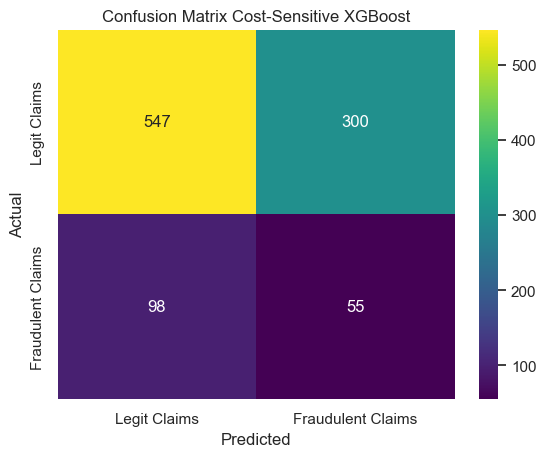

In [534]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Legit Claims","Fraudulent Claims"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Cost-Sensitive XGBoost')
plt.show()

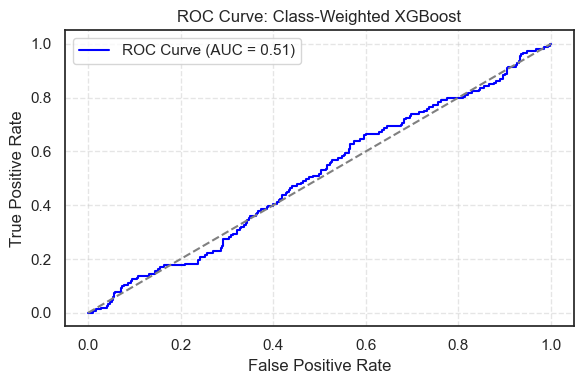

In [530]:
# Compute predicted probabilities for the positive class (1 = Fraudulent Claims)
y_pred_prob = grid_search_xgb_cw.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Class-Weighted XGBoost')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

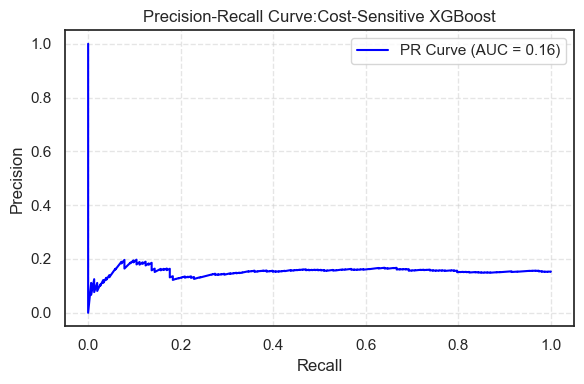

In [532]:
# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:Cost-Sensitive XGBoost')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Overall Model Performance 

In [509]:
summary_df = pd.read_csv('Model_Performance_Summary.csv')

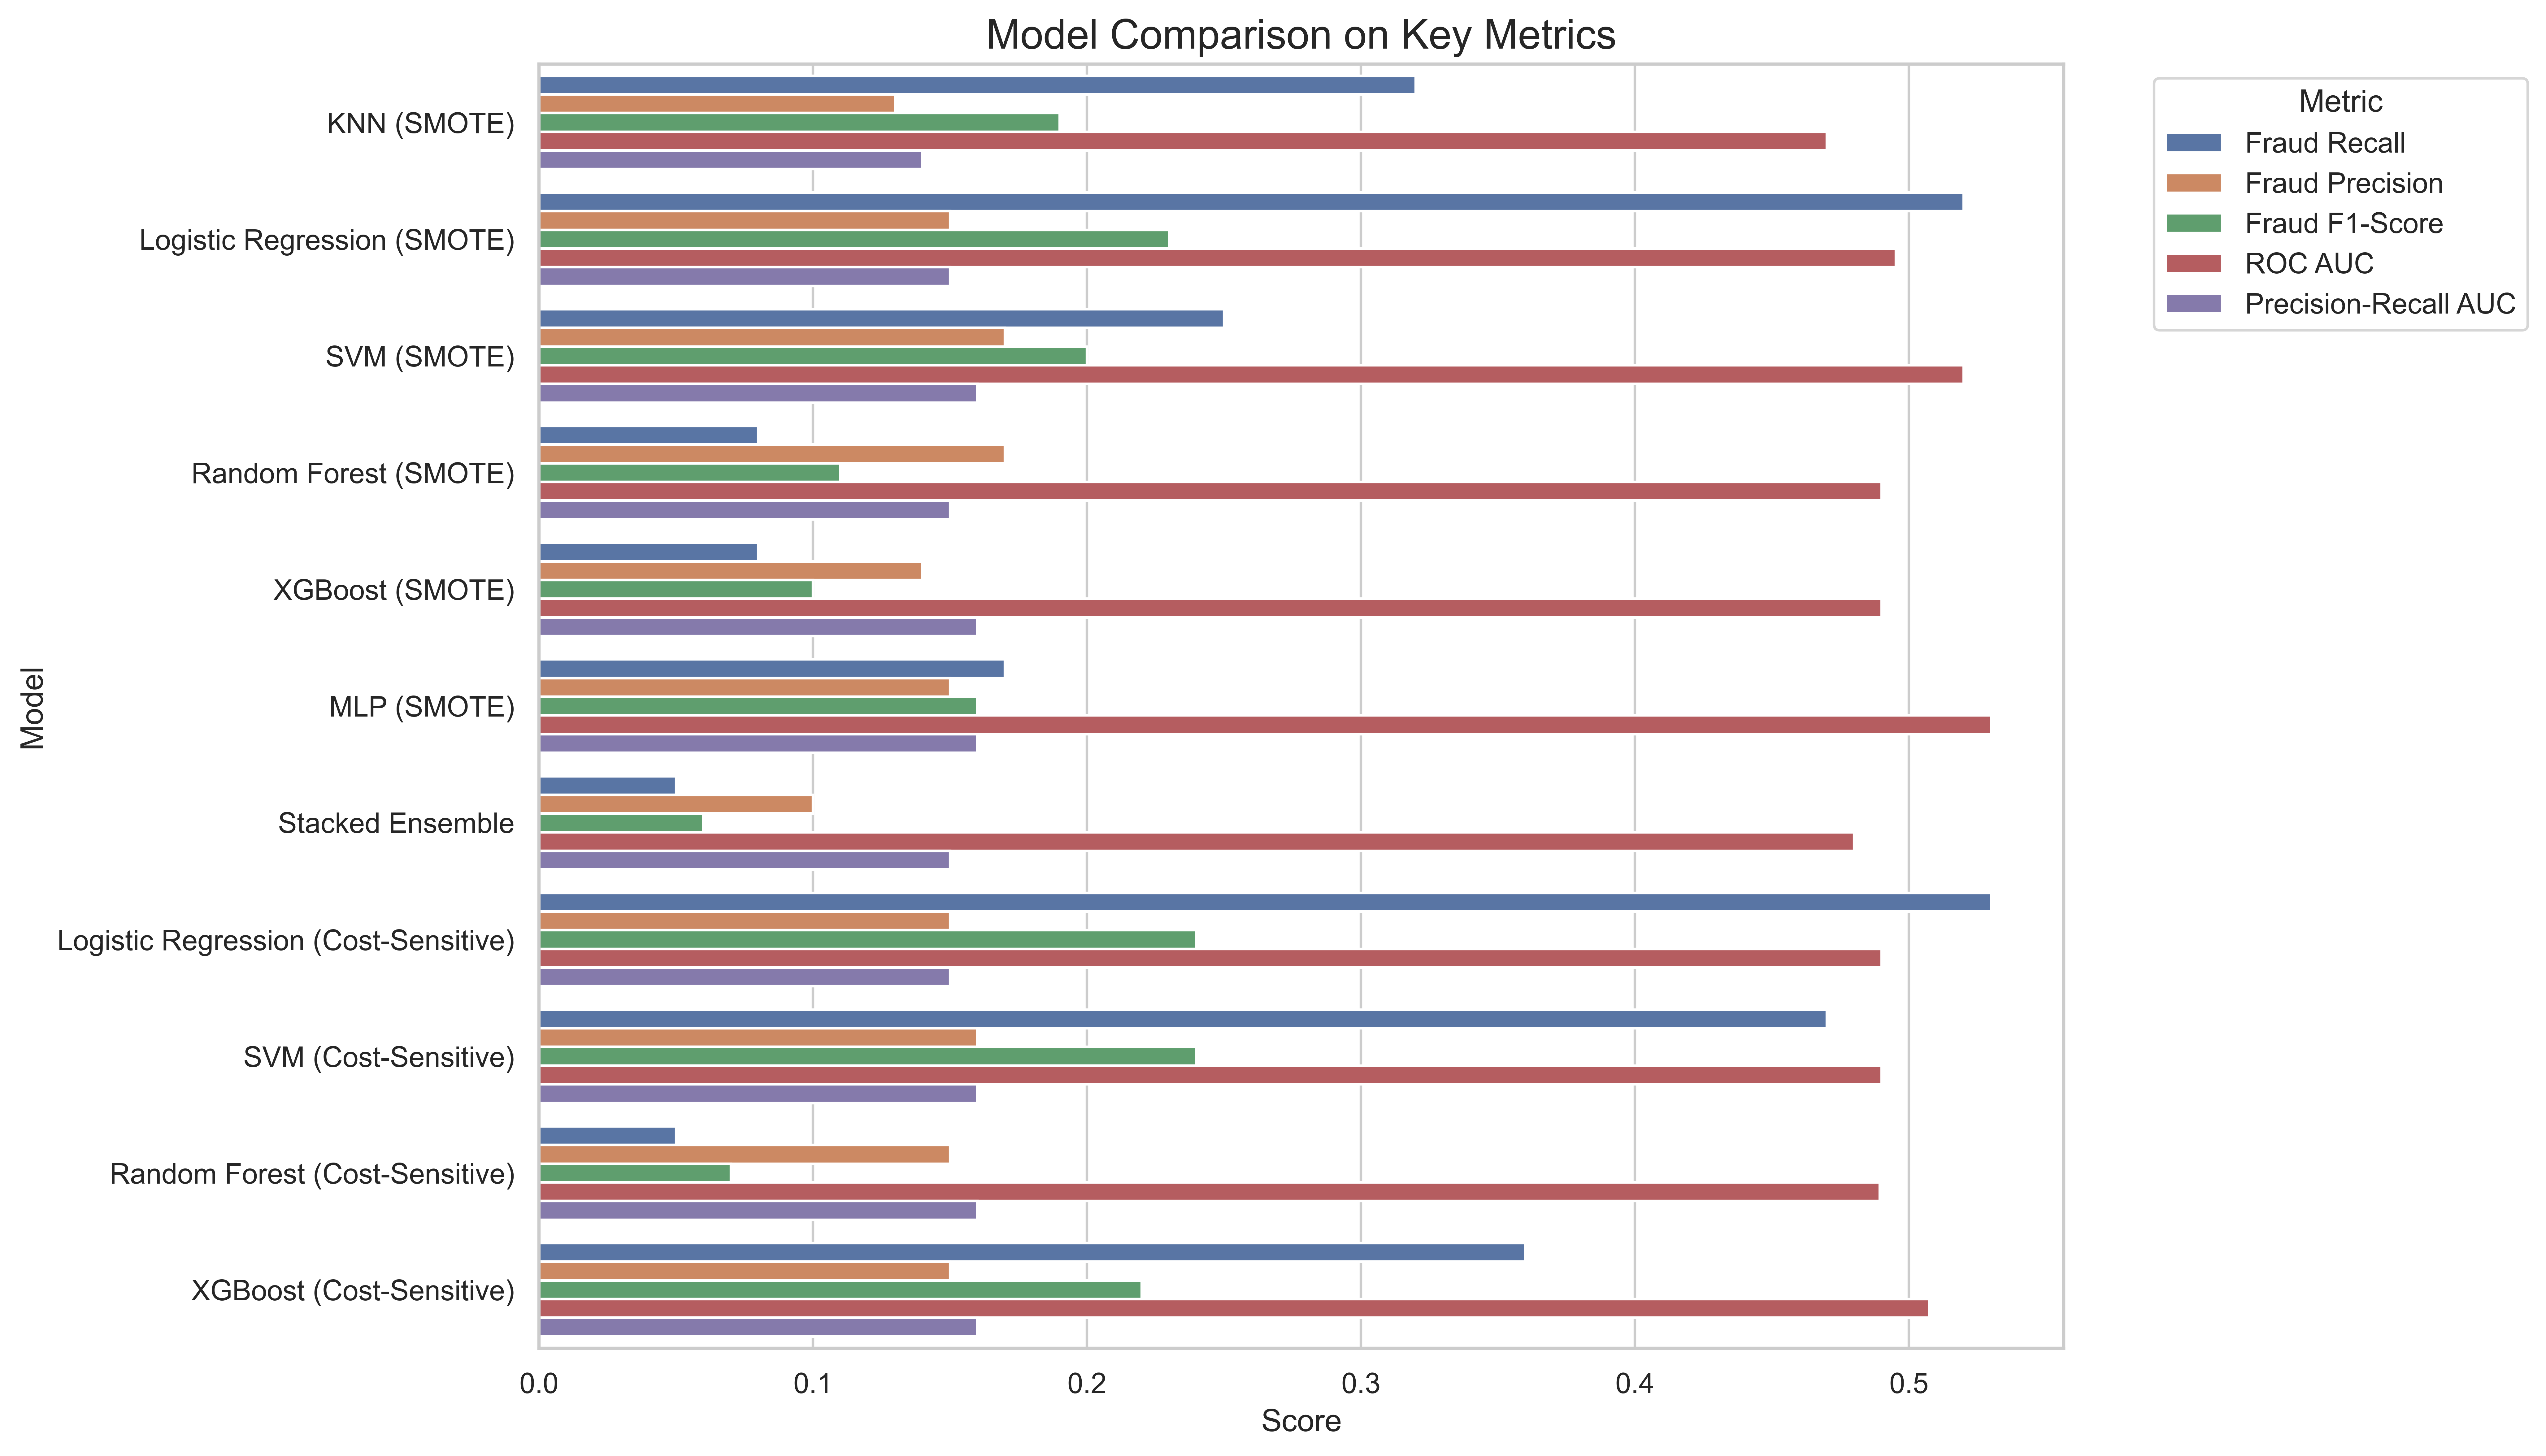

In [506]:
sns.set(style="whitegrid")

# Melt the DataFrame for plotting
melted_df = summary_df.melt(id_vars="Model", value_vars=["Fraud Recall", "Fraud Precision", "Fraud F1-Score", "ROC AUC", "Precision-Recall AUC"],
                            var_name="Metric", value_name="Score")

# Create a barplot for comparison across models and metrics
plt.figure(figsize=(14, 8), dpi = 600)
sns.barplot(data=melted_df, x="Score", y="Model", hue="Metric")
plt.title("Model Comparison on Key Metrics", fontsize=16)
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Performance.png", dpi=600, bbox_inches="tight", format="png")
plt.show()

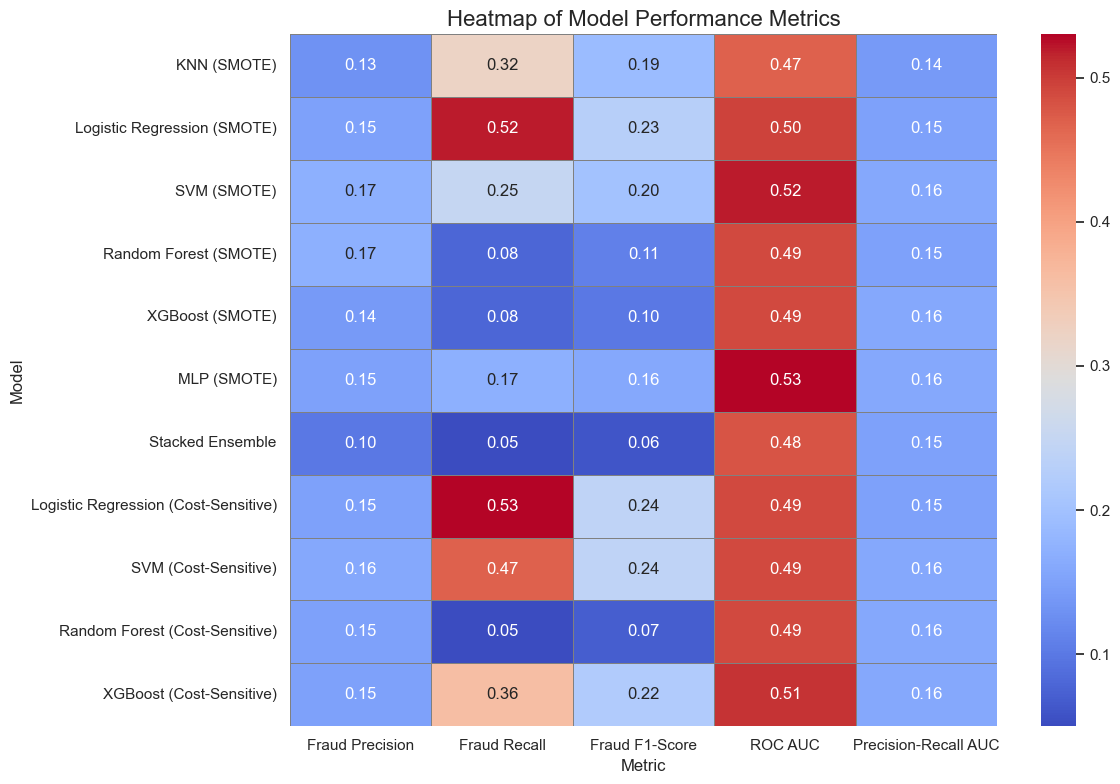

In [511]:
# Prepare data for heatmap
heatmap_data = summary_df.set_index("Model")[["Fraud Precision", "Fraud Recall", "Fraud F1-Score", "ROC AUC", "Precision-Recall AUC"]]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Model Performance Metrics", fontsize=16)
plt.xlabel("Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig("Performance_heatmap.png", dpi=600, bbox_inches="tight", format="png")
plt.show()

###  Feature Importance Analysis

Both **Random Forest** and **SHAP (XGBoost)** analyses consistently identified **Claim Amount**, **Customer Income**, and **Claim Submission Delay** as the top predictors of fraud. These features reflect key financial and behavioral signals.

- **High claim amounts** and **longer submission delays** were strongly associated with fraudulent claims.
- **Lower incomes** and **younger customers** showed increased fraud risk.
- **SHAP** provided deeper insights by showing how specific feature values (e.g., high delay, low income) pushed predictions toward fraud.

Although Random Forest ranked features by overall importance, SHAP explained their individual impact on predictions. Together, they confirm that a blend of **financial behavior**, **demographics**, and **claim patterns** drives fraud detection in this dataset.



### Top Performing Models for Detecting Fraud (Recall-Focused)

1. **Logistic Regression (SMOTE)** achieved the highest fraud recall (**52%**) with a reasonable F1-score (**0.23**), making it a strong baseline for identifying fraudulent cases.
2. **SVM (Cost-Sensitive)** also performed well with **47% fraud recall** and a similar F1-score (**0.24**), showing that class weighting can be effective without altering the data distribution.
3. **XGBoost (Cost-Sensitive)** detected **36% of fraud cases** and had a slightly higher ROC AUC (**0.5074**), offering a solid balance between model complexity and interpretability.

---

### Models with High Overall Accuracy but Low Fraud Detection

1. **Random Forest (Cost-Sensitive)** had the highest overall accuracy (**81%**) but only captured **5%** of fraud cases, highlighting a common trade-off where the model favors the majority class.
2. Similarly, **Random Forest (SMOTE)** and **XGBoost (SMOTE)** achieved high accuracy (~**79%**) but identified less than **10%** of fraud cases.

---

### Ensemble & Neural Network Models

- **MLP (SMOTE)** and **Stacked Ensemble** achieved good overall performance but did not outperform simpler models in fraud recall, suggesting that more complex architectures may not yield better results under current data conditions.


###  Key Takeaway and Recommendations

Based on the evaluation of multiple machine learning models, the next steps aim to improve fraud detection while ensuring the system remains practical and reliable for business use. **Logistic Regression (SMOTE)** and **Support Vector Machine (SVM)** with cost-sensitive learning emerged as the most promising models, achieving the highest recall for fraudulent claims. These models are recommended as baseline options for initial deployment.

To further enhance performance, tuning the decision threshold is necessary. This involves adjusting the probability cut-off used to classify fraud, allowing better control over the trade-off between detecting fraud and limiting false positives. Additionally, improving the quality of features can significantly strengthen model performance. New features, such as **claim-to-income ratios** or **interactions between submission delay and claim amount**, may help the model learn more meaningful patterns.

While ensemble methods were explored, a **custom voting ensemble** combining the top-performing models may offer better results than a general stacked approach. This can provide more balanced predictions and reduce model variance.

Finally, due to the inherent challenge of achieving high precision in imbalanced datasets, it is advisable to use the model as a **decision-support tool** rather than for automated rejection. Predictions should be used to **flag high-risk claims** for further manual investigation.
